# Продажа квартир - исследование

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Задача: определить, от чего зависит рыночная стоимость квартир. 

**Описание данных:**

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от
публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

***Пояснение:*** *апартаменты — это нежилые помещения, имеющие необходимые условия для проживания.*

### Шаг 1. Открытие файла с данными и изучение общей информации. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Импортируем библиотеку `pandas` и прочитаем файл с данными в переменную `data`:

In [ ]:
#Импортируем библиотеки pandas и numpy:
import pandas as pd
import numpy as np

from sklearn import preprocessing

#Импортируем графические библиотеки:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [ ]:

#Прочитаем файл в переменную data:
data = pd.read_csv('/content/gdrive/My Drive/Yandex_datasets/real_estate_data.csv', sep ='\t')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [ ]:
from IPython.display import display
#Распечатаем первые 10 значений таблицы data:
print(display(data.head(10)))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0000,108.0000,2019-03-07T00:00:00,3,2.7000,16.0000,51.0000,8,NaN,False,False,25.0000,nan,Санкт-Петербург,18863.0000,16028.0000,1.0000,482.0000,2.0000,755.0000,nan
1,7,3350000.0000,40.4000,2018-12-04T00:00:00,1,nan,11.0000,18.6000,1,NaN,False,False,11.0000,2.0000,посёлок Шушары,12817.0000,18603.0000,0.0000,nan,0.0000,nan,81.0000
2,10,5196000.0000,56.0000,2015-08-20T00:00:00,2,nan,5.0000,34.3000,4,NaN,False,False,8.3000,0.0000,Санкт-Петербург,21741.0000,13933.0000,1.0000,90.0000,2.0000,574.0000,558.0000
3,0,64900000.0000,159.0000,2015-07-24T00:00:00,3,nan,14.0000,nan,9,NaN,False,False,nan,0.0000,Санкт-Петербург,28098.0000,6800.0000,2.0000,84.0000,3.0000,234.0000,424.0000
4,2,10000000.0000,100.0000,2018-06-19T00:00:00,2,3.0300,14.0000,32.0000,13,NaN,False,False,41.0000,nan,Санкт-Петербург,31856.0000,8098.0000,2.0000,112.0000,1.0000,48.0000,121.0000
5,10,2890000.0000,30.4000,2018-09-10T00:00:00,1,nan,12.0000,14.4000,5,NaN,False,False,9.1000,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.0000
6,6,3700000.0000,37.3000,2017-11-02T00:00:00,1,nan,26.0000,10.6000,6,NaN,False,False,14.4000,1.0000,посёлок Парголово,52996.0000,19143.0000,0.0000,nan,0.0000,nan,155.0000
7,5,7915000.0000,71.6000,2019-04-18T00:00:00,2,nan,24.0000,nan,22,NaN,False,False,18.9000,2.0000,Санкт-Петербург,23982.0000,11634.0000,0.0000,nan,0.0000,nan,nan
8,20,2900000.0000,33.1600,2018-05-23T00:00:00,1,nan,27.0000,15.4300,26,NaN,False,False,8.8100,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.0000
9,18,5400000.0000,61.0000,2017-02-26T00:00:00,3,2.5000,9.0000,43.6000,7,NaN,False,False,6.5000,2.0000,Санкт-Петербург,50898.0000,15008.0000,0.0000,nan,0.0000,nan,289.0000


None


Распечатаем общую информацию о таблице `data`:

In [ ]:
#Распечатаем общую информацию о таблице data:  
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим на диапазон значений категориальных и логических переменных, а также базовые статистики численных переменных.

In [ ]:
#Составим функцию:
def info(data, column):
    
    """
    Функция берет датафрейм и признак из него, выводит уникальные значения и базовые статистики
    Если тип переменной object, то осматриваются частота появлений уникальных значений, в противном случае статистики
    
    """
    
    if data[column].dtype == 'object':
        print('Признак:', column)
        print('Уникальные:\n', data[column].value_counts())
        
    else:
        print('Признак:', column)
        print('Статистики\n', data[column].describe())

In [ ]:
#Воспользуемся функцией info для всех столбцов:
for row in data:
    info(data, row)
    print()

Признак: total_images
Статистики
 count   23699.0000
mean        9.8585
std         5.6825
min         0.0000
25%         6.0000
50%         9.0000
75%        14.0000
max        50.0000
Name: total_images, dtype: float64

Признак: last_price
Статистики
 count       23699.0000
mean      6541548.7716
std      10887013.2675
min         12190.0000
25%       3400000.0000
50%       4650000.0000
75%       6800000.0000
max     763000000.0000
Name: last_price, dtype: float64

Признак: total_area
Статистики
 count   23699.0000
mean       60.3487
std        35.6541
min        12.0000
25%        40.0000
50%        52.0000
75%        69.9000
max       900.0000
Name: total_area, dtype: float64

Признак: first_day_exposition
Уникальные:
 2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2016-08-26T00:00:00      1
2014-12-13T00:00:00      1
2015-05-05T00:00:00      1
2015-04-21T00:00:00     

<a id='section11'></a>

### Вывод

В наших данных имеются 17 столбцов с численными значениями, 3 столбца типа 'object', 2 столбца типа `bool`.

Подробное описание столбцов:

* `total_images` — число фотографий квартиры в объявлении **(целое число)**
* `last_price` — цена на момент снятия с публикации **(число)**
* `total_area` — площадь квартиры в квадратных метрах (м²) **(число)**
* `first_day_exposition` — дата публикации **(категориальная переменная)**
* `rooms` — число комнат **(целое число)**
* `ceiling_height` — высота потолков (м) **(число)**
* `floors_total` — всего этажей в доме **(число)**
* `living_area` — жилая площадь в квадратных метрах (м²) **(число)**
* `floor` — этаж **(целое число)**
* `is_apartment` — апартаменты (булев тип) **(категориальная переменная)**
* `studio` — квартира-студия (булев тип) **(булев тип)**
* `open_plan` — свободная планировка (булев тип) **(булев тип)**
* `kitchen_area` — площадь кухни в квадратных метрах (м²) **(число)**
* `balcony` — число балконов **(число)**
* `locality_name` — название населённого пункта **(категориальная переменная)**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) **(число)**
* `cityCenters_nearest` — расстояние до центра города (м) **(число)**
* `parks_around3000` — число парков в радиусе 3 км **(число)**
* `parks_nearest` — расстояние до ближайшего парка (м) **(число)**
* `ponds_around3000` — число водоёмов в радиусе 3 км **(число)**
* `ponds_nearest` — расстояние до ближайшего водоёма (м) **(число)**
* `days_exposition` — сколько дней было размещено объявление (от
публикации до снятия) **(число)**



















Мы видим, что некоторые столбцы, которые должны иметь булев тип, имеют вид категориальной переменной (`is_apartment`). 

Некоторые столбцы, должные быть целочисленными, имеют вид числа с плавающей точкой (`balcony`, `floors_total`, балконов не может быть полтора, этажей в доме тоже). 

В столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`,  `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` значений меньше, чем в остальных. Это значит, что в них имеются пропущенные данные.

Имеется 0 количество комнат. 

Имеется высота потолков 1 метр и 100 м.

Минимальное количество водоемов - 0, при этом все расстояния до ближайшего водоема больше 0 и меньше 3000, но имеются пропущенные значения - с этим надо разобраться.

### Шаг 2. Предобработка данных

#### Обработка пропусков

<div class="alert alert-block alert-info">
<b>Попробуем узнать, откуда взялось нулевое значение комнат и проверить, являются ли такие квартиры студиями:</b>
</div>

In [ ]:
data.query('rooms == 0')['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

Не все такие квартиры являются студиями. Если не указано, что квартира - студия, поменяем нулевое число комнат на 1:

In [ ]:
#Перебираем циклом все строки, если комнат меньше 1 и не студия, заменяем на единицу:
index=0
for row in data.values:
    if row[4] < 1 and row[10]== False:
        data.loc[index, 'rooms'] = 1
    index +=1
#Посмотрим еще раз статистики:
print(data['rooms'].describe())

count   23699.0000
mean        2.0731
std         1.0748
min         0.0000
25%         1.0000
50%         2.0000
75%         3.0000
max        19.0000
Name: rooms, dtype: float64


Постараемся избавиться от пропущенных значений в данных. Первый столбец с пропущенными значениями - `ceiling_height` (высота потолков). Также обратим внимание на то, что в нем есть высота потолков 1 м. Заменим пропущенные значения и значения меньше 2 м, т.к. это некорректная информация, на медианное значение высоты потолков для данного типа домов (тип определим по количеству этажей). Если количество этажей не указано, заменяем на общую медиану:


In [ ]:
print('До обработки пропущено: {} значений в {} строках'.format(data['ceiling_height'].isna().sum(), data.shape[0]))


#Перебираем циклом все строки, если высота потолка меньше 2, заменяем на медиану:
index=0
for row in data.values:
    if pd.isna(row[5]) or row[5] < 2:
        if pd.isna(row[5]) or data.query('floors_total == @row[6]')['ceiling_height'].median()<2:
            data.loc[index, 'ceiling_height'] = data['ceiling_height'].median()
        else:
            data.loc[index, 'ceiling_height'] = data.query('floors_total == @row[6]')['ceiling_height'].median()
    index +=1


print('После обработки пропущено: {} значений в {} строках'.format(data['ceiling_height'].isna().sum(), data.shape[0]))

#Посмотрим еще раз статистики:
print(data['ceiling_height'].describe())

До обработки пропущено: 9195 значений в 23699 строках
После обработки пропущено: 0 значений в 23699 строках
count   23699.0000
mean        2.7245
std         0.9882
min         2.0000
25%         2.6000
50%         2.6500
75%         2.7000
max       100.0000
Name: ceiling_height, dtype: float64


In [ ]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Разберемся с высотой потолков 100 м. Посмотрим, как распределена высота потолков:

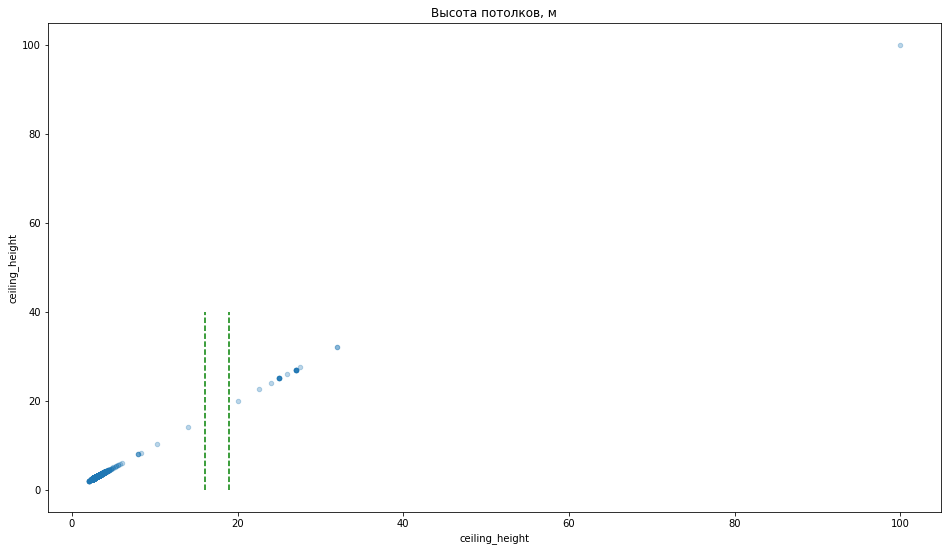

In [ ]:
data.plot(x = 'ceiling_height', y='ceiling_height', kind='scatter', alpha = 0.3, figsize = (16,9), title = 'Высота потолков, м')
x = data['ceiling_height']
plt.plot((19,19), (0, 40), 
                 color='green', linestyle = '--')
plt.plot((16,16), (0, 40), 
                 color='green', linestyle = '--')


Видно, что данные у нас достаточно четко бьтся на 2 группы: до 14 и после 20. Такое впечатление, что для некоторых данных высоту задавали не в метрах, а в дециметрах. Переведем значения >20 из дециметров в метры:

In [ ]:
#Перебираем циклом все строки, если высота потолка больше 20, делим на 10:
index=0
for row in data.values:
    if row[5] >= 20:
        data.loc[index, 'ceiling_height'] = data.loc[index, 'ceiling_height']/10
    index +=1

#Посмотрим еще раз статистики:
print(data['ceiling_height'].describe())

count   23699.0000
mean        2.6989
std         0.2527
min         2.0000
25%         2.6000
50%         2.6500
75%         2.7000
max        14.0000
Name: ceiling_height, dtype: float64


У нас получилась максимальная высота 15 метров. Ну... с трудом, но еще можно в такое поверить. Заметим что значение медианы у нас не изменилось.

Следующий столбец с пропущенными значениями - `floors_total` (всего этажей в доме). Мы не будем заменять пропущенные значения, т.к. здесь восстановление данных затруднено.

Обработаем столбец `living_area`. У нас есть данные по общей площади. Сделаем вспомогательный столбец `living_per_total`- отношение жилой площади к общей площади и затем воспользуемся его средним значением по количеству комнат для нахождения жилой площади:

In [ ]:
print('До обработки пропущено: {} значений в {} строках'.format(data['living_area'].isna().sum(), data.shape[0]))

#Новый столбец - отношение площадей:
data['living_per_total']= data['living_area']/data['total_area']

#Перебираем строки, если значение жилой площади пропущено, заменяем его на медиану
#'living_per_total' по данному количеству комнат, умножив на 'total_area' :
index=0
for row in data.values:
    if pd.isna(row[7]):
        data.loc[index, 'living_area']= data[data['rooms']==row[4]]['living_per_total'].median()*data.loc[index, 'total_area']
        data.loc[index,'living_per_total'] = data[data['rooms']==row[4]]['living_per_total'].median()
    index +=1

print('После обработки пропущено: {} значений в {} строках'.format(data['living_area'].isna().sum(), data.shape[0]))

До обработки пропущено: 1903 значений в 23699 строках
После обработки пропущено: 0 значений в 23699 строках


Переменной `is_apartment` сразу поменяем тип на `bool`. Будем считать что пропущенные значения соответствуют значению параметра `False`. После конвертации типа наши пропущенные данные автоматически инициировались этим значением:

In [ ]:
data['is_apartment'] = data['is_apartment'].astype(bool)

print('До обработки пропущено: {} значений в {} строках'.format(data['is_apartment'].isna().sum(), data.shape[0]))

До обработки пропущено: 0 значений в 23699 строках


In [ ]:
print(display(data.head()))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_per_total
0,20,13000000.0000,108.0000,2019-03-07T00:00:00,3,2.7000,16.0000,51.0000,8,True,False,False,25.0000,nan,Санкт-Петербург,18863.0000,16028.0000,1.0000,482.0000,2.0000,755.0000,nan,0.4722
1,7,3350000.0000,40.4000,2018-12-04T00:00:00,1,2.6500,11.0000,18.6000,1,True,False,False,11.0000,2.0000,посёлок Шушары,12817.0000,18603.0000,0.0000,nan,0.0000,nan,81.0000,0.4604
2,10,5196000.0000,56.0000,2015-08-20T00:00:00,2,2.6500,5.0000,34.3000,4,True,False,False,8.3000,0.0000,Санкт-Петербург,21741.0000,13933.0000,1.0000,90.0000,2.0000,574.0000,558.0000,0.6125
3,0,64900000.0000,159.0000,2015-07-24T00:00:00,3,2.6500,14.0000,100.4350,9,True,False,False,nan,0.0000,Санкт-Петербург,28098.0000,6800.0000,2.0000,84.0000,3.0000,234.0000,424.0000,0.6317
4,2,10000000.0000,100.0000,2018-06-19T00:00:00,2,3.0300,14.0000,32.0000,13,True,False,False,41.0000,nan,Санкт-Петербург,31856.0000,8098.0000,2.0000,112.0000,1.0000,48.0000,121.0000,0.3200


None


Пропущенные значения столбца `kitchen_area` заменим по тому же принципу, что и `living_area`: создадим дополнительный столбец `kitchen_per_total` с отношением площади кухни к общей площади и воспользуемся его средним значением по количеству комнат для вычисления "потерянной" площади кухни:

In [ ]:
print('До обработки пропущено: {} значений в {} строках'.format(data['kitchen_area'].isna().sum(), data.shape[0]))

#Новый столбец - отношение площадей:
data['kitchen_per_total']= data['kitchen_area']/data['total_area']

#Перебираем строки, если значение площади кухни пропущено, заменяем его на медиану
#'kitchen_per_total' по данному количеству комнат, умножив на 'total_area' :
index=0
for row in data.values:
    if pd.isna(row[12]):
      if row[4] == 0:
        data.loc[index, 'kitchen_area']=0
      else:
        data.loc[index, 'kitchen_area']= data[data['rooms']==row[4]]['kitchen_per_total'].median()*data.loc[index, 'total_area']
        data.loc[index,'kitchen_per_total'] = data[data['rooms']==row[4]]['kitchen_per_total'].median()
    index +=1

print('После обработки пропущено: {} значений в {} строках'.format(data['kitchen_area'].isna().sum(), data.shape[0]))

До обработки пропущено: 2278 значений в 23699 строках
После обработки пропущено: 0 значений в 23699 строках


`balcony` - количество балконов. Если не указано, принимаем 0.

In [ ]:
print('До обработки пропущено: {} значений в {} строках'.format(data['balcony'].isna().sum(), data.shape[0]))

#Заменяем пропущенные значения методом fillna()
data['balcony'] = data['balcony'].fillna(0)

print('После обработки пропущено: {} значений в {} строках'.format(data['balcony'].isna().sum(), data.shape[0]))

До обработки пропущено: 11519 значений в 23699 строках
После обработки пропущено: 0 значений в 23699 строках


`locality_name` - название населенного пункта. Здесь оставим пропущенные значения, т.к. не понятно, как восстановить эту информацию.


`airports_nearest` можно найти более точно, если запросить еще раз геоданные по адресу, но у нас такой возможности нет. Попробуем заполнить медианным значением по населенному пункту:

In [ ]:
print('До обработки пропущено: {} значений в {} строках'.format(data['airports_nearest'].isna().sum(), data.shape[0]))

#Перебираем циклом все строки, если значение 'airports_nearest' пропущено, заменяем 'airports_nearest' на медиану по данному населенному пункту:
index=0
for row in data.values:
    if pd.isna(row[15]):
        if not pd.isna(row[14]):
            data.loc[index, 'airports_nearest']= data[data['locality_name']==row[14]]['airports_nearest'].median()
    index +=1

print('После обработки пропущено: {} значений в {} строках'.format(data['airports_nearest'].isna().sum(), data.shape[0]))

До обработки пропущено: 5542 значений в 23699 строках
После обработки пропущено: 5394 значений в 23699 строках


Как видно, несколько значений заполнились, но в основном по населенным пунктам у нас тоже нет информации, и значения остались пропущенными.

`cityCenters_nearest` также можно найти точно по геоданным по адресу квартиры. Заполнять эти данные чем-то другим мы не будем, т.к. удаленность от центра - это чрезвычайно важный параметр для продажи квартиры, и нам важно не исказить данные. 

`parks_around3000` и `parks_nearest` - количество парков в радиусе 3 км и удаленность от бижайшего парка. Очевидно, связанные друг с другом параметры: если `parks_nearest`< 3000, то `parks_around3000` должен быть хотя бы один. Заменим такие пропущенные значения, если они есть:

In [ ]:
print('До обработки пропущено: {} значений в {} строках'.format(data['parks_around3000'].isna().sum(), data.shape[0]))

index=0
for row in data.values:
    if pd.isna(row[17]):
        if (not pd.isna(row[18])) and row[18] <=3000:
            data.loc[index, 'parks_around3000']= 1
    index +=1
print('После обработки пропущено: {} значений в {} строках'.format(data['parks_around3000'].isna().sum(), data.shape[0]))

До обработки пропущено: 5518 значений в 23699 строках
После обработки пропущено: 5518 значений в 23699 строках


Таких значений нет.

Посмотрим, какие значения `parks_around3000`, если `parks_nearest`>3000:

In [ ]:
for row in data[data['parks_nearest'] >3000].values:
    if not pd.isna(row[17]):
        print(row[17])

0.0
0.0
0.0
0.0


Пропущенные значения `parks_around3000` и `parks_nearest` не будем заменять. Эту информацию либо не указали, либо была неправильная выгрузка геоданных).

`ponds_around3000` и `ponds_nearest` - количество водоемов в радиусе 3 км и удаленность от ближайшего водоема. Очевидно, связанные друг с другом параметры: если `ponds_nearest`< 3000, то `ponds_around3000` должен быть хотя бы один. Заменим такие пропущенные значения, если они есть:

In [ ]:
print('До обработки пропущено: {} значений в {} строках'.format(data['ponds_around3000'].isna().sum(), data.shape[0]))

index=0
for row in data.values:
    if pd.isna(row[19]):
        if (not pd.isna(row[20])) and row[20] <=3000:
            data.loc[index, 'ponds_around3000']= 1
    index +=1
print('После обработки пропущено: {} значений в {} строках'.format(data['ponds_around3000'].isna().sum(), data.shape[0]))

До обработки пропущено: 5518 значений в 23699 строках
После обработки пропущено: 5518 значений в 23699 строках


Таких значений нет.

Посмотрим, каково значение `ponds_nearest`, если водоемов 0:

In [ ]:
for row in data[data['ponds_around3000'] ==0].values:
    if not pd.isna(row[20]):
        print(row[20])

Таких значений нет.

Пропущенные значения `ponds_around3000` и `ponds_nearest` не будем заменять. Эту информацию либо не указали, либо была неправильная выгрузка геоданных).

Посмотрим на пропущенные значения `days_exposition`совместно с датой публикации (отсортируем даты публикации для пропущенных значений времени показов):

In [ ]:
data[data['days_exposition'].isna()]['first_day_exposition'].sort_values(ascending = False)

9217     2019-05-03T00:00:00
13993    2019-05-03T00:00:00
15881    2019-05-03T00:00:00
17551    2019-05-03T00:00:00
12003    2019-05-03T00:00:00
                ...         
15614    2014-12-09T00:00:00
6922     2014-12-08T00:00:00
3291     2014-11-27T00:00:00
15857    2014-11-27T00:00:00
3873     2014-11-27T00:00:00
Name: first_day_exposition, Length: 3181, dtype: object

Видно, что это объявления за разные даты. Возможно, эти квартиры все еще не продались, возможно, продались в первый день, или была неправильная выгрузка данных - точную причину пропусков тяжело установить.

Заменим пропущенные данные `days_exposition` на 0 (у нас такого значения не было, и мы будем знать, что 0 - это бывшие "пропуски", но нам удобнее будет работать с таблицей:

In [ ]:
print('До обработки пропущено: {} значений в {} строках'.format(data['days_exposition'].isna().sum(), data.shape[0]))
data['days_exposition'] = data['days_exposition'].fillna(0)
print('После обработки пропущено: {} значений в {} строках'.format(data['days_exposition'].isna().sum(), data.shape[0]))


До обработки пропущено: 3181 значений в 23699 строках
После обработки пропущено: 0 значений в 23699 строках


#### Обработка дубликатов

Проверим количество дубликатов в наших данных:

In [ ]:
data.duplicated().sum()

0

Дубликатов нет.

#### Изменение типов данных

Получим еще раз общую информацию о таблице:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

`balcony`, `days_exposition` - заменим тип этих столбцов на целочисленный методом `astype()`:

In [ ]:
data['balcony']=data['balcony'].astype(int)
#data['parks_around3000']=data['parks_around3000'].astype(int)
#data['ponds_around3000']=data['ponds_around3000'].astype(int)
data['days_exposition']=data['days_exposition'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Переведем `first_day_exposition` в формат даты (год=месяц-число часы:минуты:секунды) и округлим с точностью до дня:

In [ ]:
#Переведем 'first_day_exposition' в формат даты, ошибки обработаем методом 'coerce' - 
#то есть в случае ошибки в таблицу будет добавляться значение NaT:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst = True, errors='coerce')

#Округлим с точностью до дня:
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D') 

#Посмотрим на данные нашей таблицы:
print(data.info())
print(display(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_per_total,kitchen_per_total
0,20,13000000.0000,108.0000,2019-03-07,3,2.7000,16.0000,51.0000,8,True,False,False,25.0000,0,Санкт-Петербург,18863.0000,16028.0000,1.0000,482.0000,2.0000,755.0000,0,0.4722,0.2315
1,7,3350000.0000,40.4000,2018-12-04,1,2.6500,11.0000,18.6000,1,True,False,False,11.0000,2,посёлок Шушары,12817.0000,18603.0000,0.0000,nan,0.0000,nan,81,0.4604,0.2723
2,10,5196000.0000,56.0000,2015-08-20,2,2.6500,5.0000,34.3000,4,True,False,False,8.3000,0,Санкт-Петербург,21741.0000,13933.0000,1.0000,90.0000,2.0000,574.0000,558,0.6125,0.1482
3,0,64900000.0000,159.0000,2015-07-24,3,2.6500,14.0000,100.4350,9,True,False,False,20.4429,0,Санкт-Петербург,28098.0000,6800.0000,2.0000,84.0000,3.0000,234.0000,424,0.6317,0.1286
4,2,10000000.0000,100.0000,2018-06-19,2,3.0300,14.0000,32.0000,13,True,False,False,41.0000,0,Санкт-Петербург,31856.0000,8098.0000,2.0000,112.0000,1.0000,48.0000,121,0.3200,0.4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0000,133.8100,2017-03-21,3,3.7000,5.0000,73.3000,3,True,False,False,13.8300,0,Санкт-Петербург,24665.0000,4232.0000,1.0000,796.0000,3.0000,381.0000,0,0.5478,0.1034
23695,14,3100000.0000,59.0000,2018-01-15,3,2.6500,5.0000,38.0000,4,True,False,False,8.5000,0,Тосно,nan,nan,nan,nan,nan,nan,45,0.6441,0.1441
23696,18,2500000.0000,56.7000,2018-02-11,2,2.6500,3.0000,29.7000,1,True,False,False,9.1330,0,село Рождествено,nan,nan,nan,nan,nan,nan,0,0.5238,0.1611
23697,13,11475000.0000,76.7500,2017-03-28,2,3.0000,17.0000,44.8995,12,True,False,False,23.3000,2,Санкт-Петербург,39140.0000,10364.0000,2.0000,173.0000,3.0000,196.0000,602,0.5850,0.3036


None


Новых пропусков у нас нет (значит, ошибок при конвертации даты не было), столбец `first_day_exposition` в формате даты выглядит корректно.

<a id='section3'></a>

### Вывод

- Мы поменяли значение количества комнат 0 на 1 для квартир, которые не являются студиями. Такая проблема могла возникнуть, скорее всего, из-за описок или неправильной интерпретации.


- Мы заменили значения высоты потолков меньше 2 метров и пропущенные значения на медиану по типу дома (тип дома находили исходя из его этажности). В случае отсутствии информации о количестве этажей дома заменяли значения высоты потолков на общую медиану. Такие проблемы могли возникнуть из-за описок и из-за неправильной выгрузки данных. Мы обнаружлили, что высоты потолков бьются достаточно четко на 2 группы - до 14 м и больше 20 м. Посчитали, что вторая группа- это неправильно выгруженные даннные в дециметрах вместо метров, и пересчитали их в метрах. 


- Мы обнаружили, что у нас пропущены значения количества этажей в доме, при этом есть значения этажа квартиры. Пропущенные значения оставлены без изменений, т.к. сложно восстановить эту информацию.


- Обработали столбец с жилой площадью. У нас есть данные по общей площади. Сделали вспомогательный столбец `living_per_total`- отношение жилой площади к общей площади и затем воспользовались его средним значением по количеству комнат для нахождения жилой площади.Такие пропуски могли возникнуть, если продавцы указывали неполную информацию.


- Столбцу "аппартаменты" поменяли тип на булевый. Будем считать что пропущенные значения соответствуют значению параметра False. После конвертации типа данных наши пропущенные данные автоматически инициировались этим значением. Такие пропуски могли возникнуть, если продавцы не указывали данный параметр при его отсутствии.


- Пропущенные значения столбца "площадь кухни" заменили по тому же принципу, что и жилую площадь: создали дополнительный столбец `kitchen_per_total` с отношением площади кухни к общей площади и воспользовались его средним значением по количеству комнат для вычисления "потерянной" площади кухни. Такие пропуски могли возникнуть, если продавцы указывали неполную информацию.


- Пропущенное количество балконов поменяли на 0. Считаем, что если их не указали, значит нет.


- Пропущенное название населенного пункта оставили без изменений, т.к. эту информацию сложно воссстановить.


- Ближайшие аэропорты можно найти более точно, если запросить еще раз геоданные по адресу, но у нас такой возможности не было. Мы попробовали заполнить медианным значением по населенному пункту, но таких данных оказалось тоже мало, таким образом, у нас остались незаполненные пропуски. Скорее всего, причина отсутствия значений в том, что были неправильные выгрузки данных, либо продавцы никогда не считали и отказались заполнять данный параметр.



- Оставили без изменений пропущенные значения "парков в окресности 3 км" и "расстояния до ближайшего парка". Причины возникновения данных пропусков - либо продавец не стал указывать данную информацию , либо была неправильная выгрузка геоданных). 


- Оставили без изменений пропущенные значения "водоемов в окресности 3 км" и "расстояния до ближайшего водоема". Причины возникновения данных пропусков - либо продавец не стал указывать данную информацию , либо была неправильная выгрузка геоданных). 


- Заменили пропущенные значения "дней размещения объявления" на 0 (у нас такого значения не было, и мы будем знать, что 0 - это бывшие "пропуски", но нам удобнее будет работать с таблицей. Причины данных пропусков точно не ясны: либо это была продажа в тот же день, либо эти квартиры все еще не продались, либо были ошибки в выгрузке.


- Мы не нашли дубликатов в наших данных


- Поменяли типы некоторых столбцов: балконы и дни показа объявления сделали целочисленными. Дату публикации перевели в формат даты и округлили до дня. 

### Шаг 3. Рассчет и добавление в таблицу

Мы уже создали дополнительные столбцы `living_per_total` и `kitchen_per_total` с отношением площадей к общей площади квартиры. Попробуем еще сосчитать и записать в новые столбцы:
- цену квадратного метра;

- день недели, месяц и год публикации объявления;

- этаж квартиры; варианты — первый, последний, другой;

In [ ]:
#Добавляем цену квадратного метра:
data['sq_meter_cost'] = data['last_price']/data['total_area']

#Добавляем день недели, месяц и год публикации:
data['weekday']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year

#Добавляем этаж квартиры: первый, последний, другой. Пусть все пропущенные значения относятся к категории "другой":
index=0
for row in data.values:
    if data.loc[index, 'floor'] == 1:
        data.loc[index, 'floor_type'] = "0"
    elif 1<data.loc[index, 'floor']<data.loc[index, 'floors_total'] or pd.isna(data.loc[index, 'floors_total']): 
        data.loc[index, 'floor_type'] = "2"
    elif data.loc[index, 'floor']==data.loc[index, 'floors_total']:
        data.loc[index, 'floor_type'] = "1"
    elif data.loc[index, 'floor']> data.loc[index, 'floors_total']:
        print('Ошибка')
        data.loc[index, 'floor_type'] = "Ошибка"
    index +=1
#Составим словарь:
floor_type_dict = {'Первый':0,'Последний':1, 'Другой':2}
#Проверим, что среди значений типа этажа нет ошибки, напечатаем список значений:    
print(data['floor_type'].value_counts())
#Проверим, что нет пропусков:
print(data['floor_type'].isna().sum())
#приведем к типу int:
data['floor_type'] = data['floor_type'].astype(int)

2    17446
1     3336
0     2917
Name: floor_type, dtype: int64
0


<a id='section31'></a>

<a id='section4'></a>

### Вывод

Мы записали в новые столбцы: 

- цену квадратного метра;

- день недели, месяц и год публикации объявления;

- этаж квартиры; варианты — первый, последний, другой;

Столбцы `living_per_total` и `kitchen_per_total` с отношением площадей к общей площади квартиры мы уже создали ранее.

### Шаг 4. Исследовательский анализ данных

In [ ]:
def histogram(row, titl='', rang=(0,0), data = data):
    plt.figure(figsize = (10,8))   
    if rang ==(0,0):
        rang = (data[row].min(), data[row].max())
    n, bins, patches = plt.hist(data[row], bins=100, range =rang, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
        
    n = n.astype('int') # it MUST be integer
    # Good old loop. Choose colormap of your taste
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.plasma_r(n[i]/max(n)))
    # Make one bin stand out   
    
    patches[47].set_alpha(1) # Set opacity
    if titl =='':
        titl = 'Гистограмма распределения '+row
    # Add title and labels with custom font sizes
    plt.title(titl, fontsize=12)
    
    plt.show()

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

Построим гистограмму распределения общей площади квартиры.

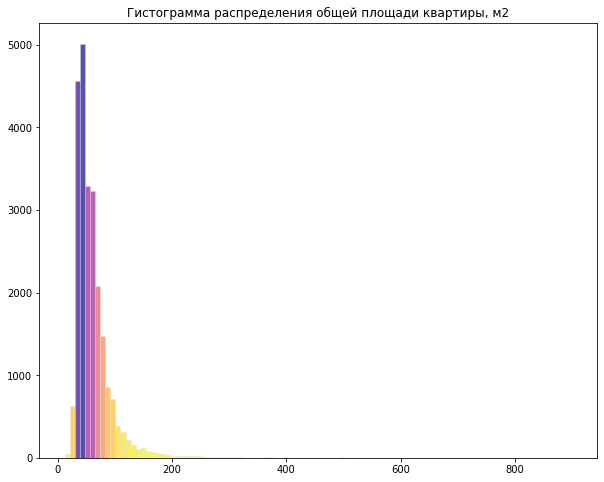

In [ ]:
histogram('total_area', 'Гистограмма распределения общей площади квартиры, м2')

"Обрежем" нашу гистограмму на значении 200 м2, т.к. мало квартир с большей площадью:

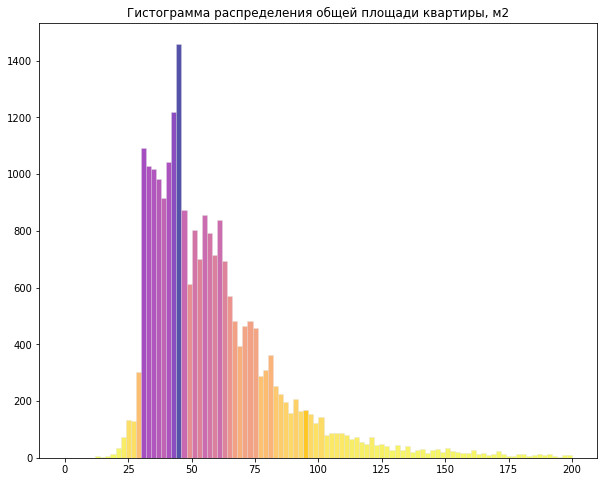

In [ ]:
histogram('total_area', 'Гистограмма распределения общей площади квартиры, м2',(0, 200))

Построим гистограмму распределения жилой площади.

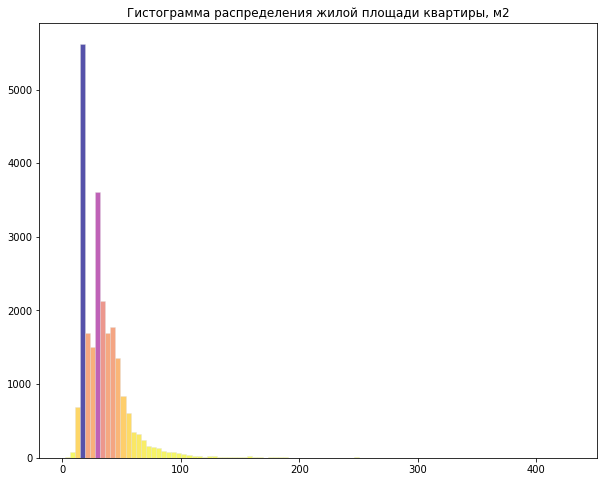

In [ ]:
histogram('living_area', 'Гистограмма распределения жилой площади квартиры, м2')

"Обрежем" нашу гистограмму на значении 150 м2, т.к. мало квартир с большей жилой площадью:

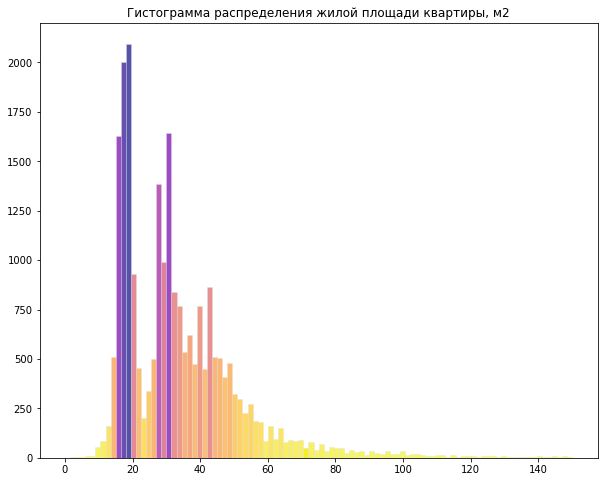

In [ ]:
histogram('living_area', 'Гистограмма распределения жилой площади квартиры, м2', (0, 150))

Построим гистограмму распределения столбца living_per_total.

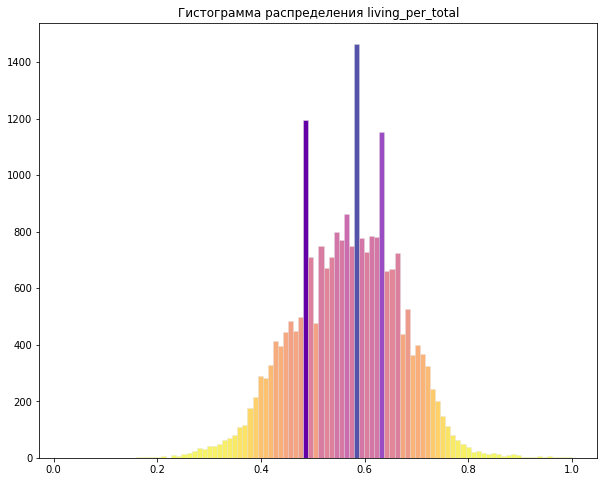

In [ ]:
histogram('living_per_total')

Ограничим гистограмму значениями 0.2 и 0.9:

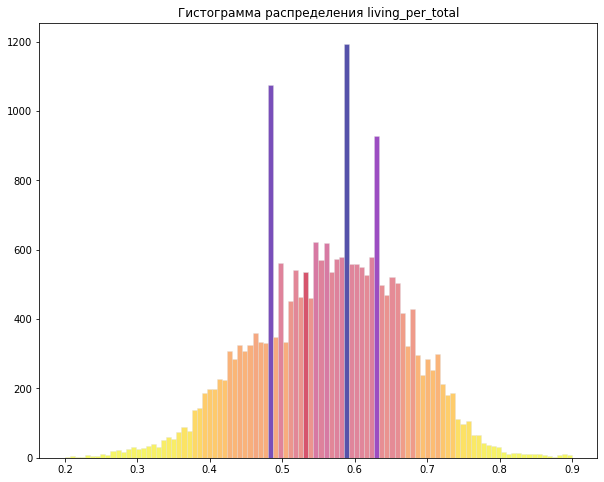

In [ ]:
histogram('living_per_total', rang=(0.2, 0.9))

Построим гистограмму распределения площади кухни.

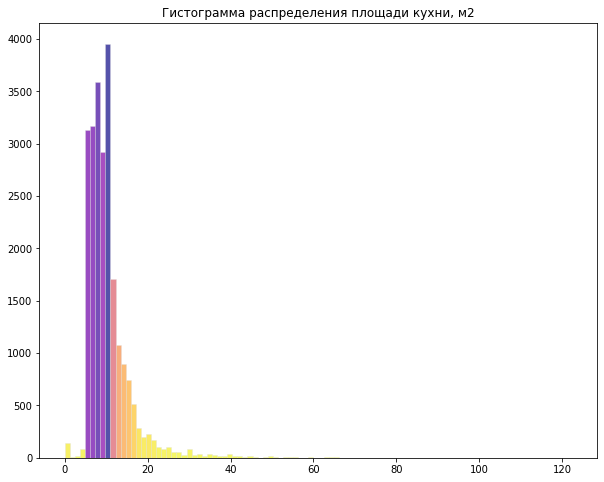

In [ ]:
histogram('kitchen_area', 'Гистограмма распределения площади кухни, м2')

"Обрежем" нашу гистограмму на значении 40 м2, т.к. мало квартир с большей площадью кухни:

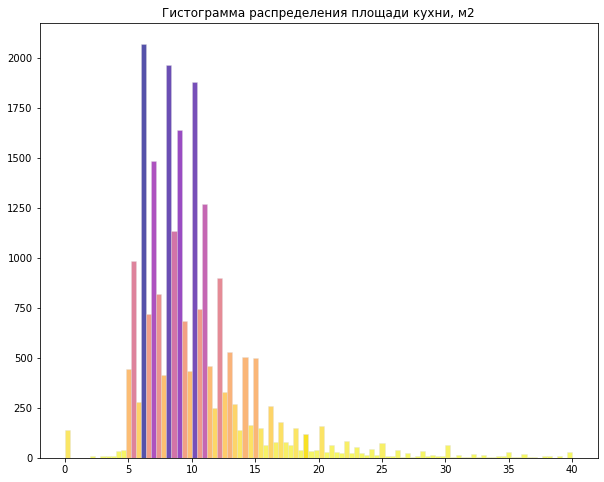

In [ ]:
histogram('kitchen_area', 'Гистограмма распределения площади кухни, м2', (0, 40))

Мы видим, что распределения жилой площади квартиры и площади кухни неравномерно, имеется много "горбов" на графиках (мультимодальность). Это связано с тем, что существуют типовые стандарты площадей.

Построим гистограмму распределения столбца kitchen_per_total.

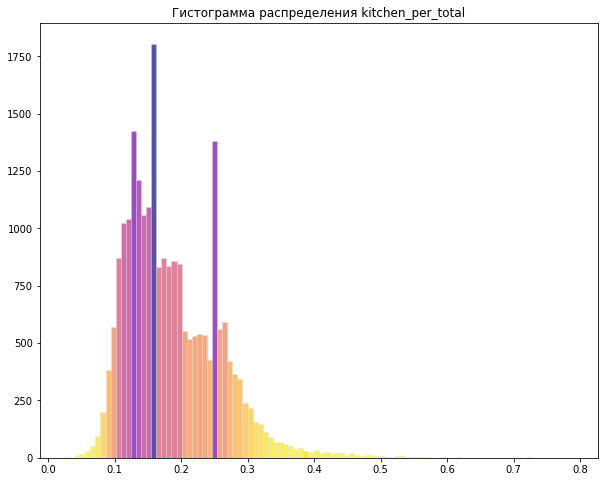

In [ ]:
histogram('kitchen_per_total')

Ограничим гистограмму значениями 0.04 и 0.5:

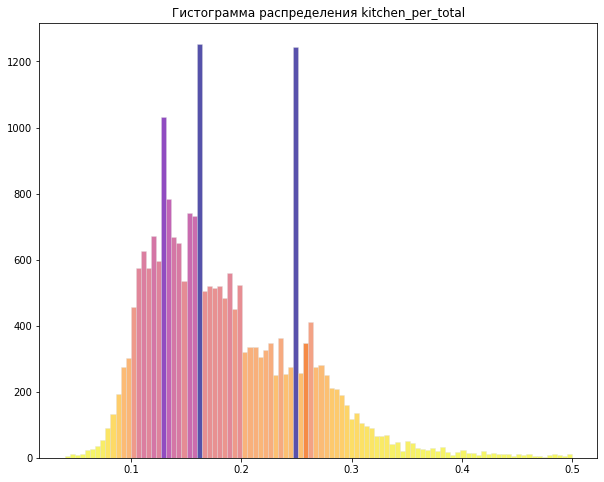

In [ ]:
histogram('kitchen_per_total', rang = (0.04, 0.5))

Мы видим также несколько пиков, "стандартных" отношений площадей.

Построим гистограмму распределения цены квартиры:

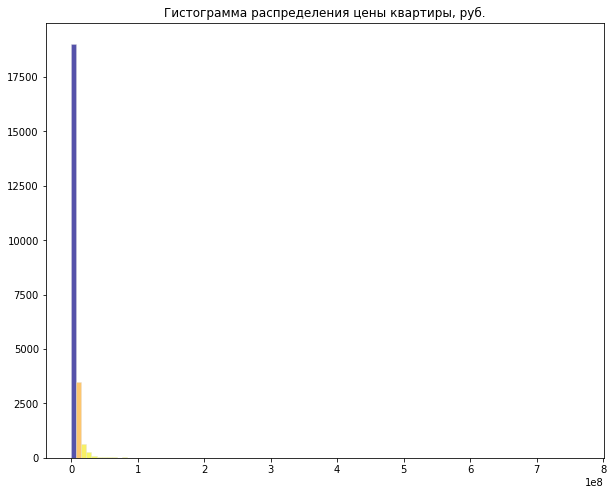

In [ ]:
histogram('last_price', 'Гистограмма распределения цены квартиры, руб.')

Ограничим график значением 30 000 000 руб., т.к. малое количество цен лежит за пределами этого значения:

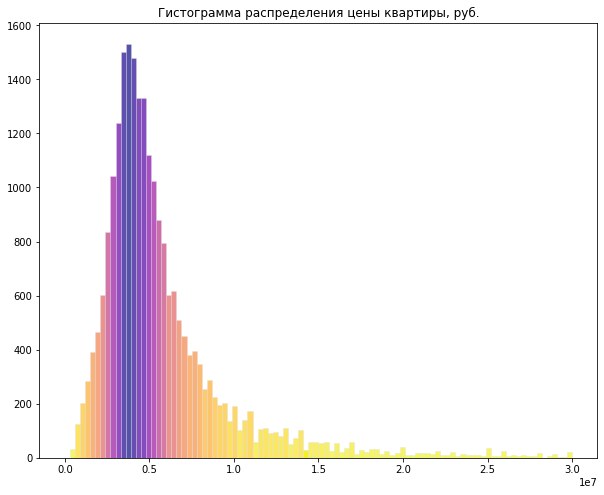

Text(0.5, 1.0, 'Вид распределения')

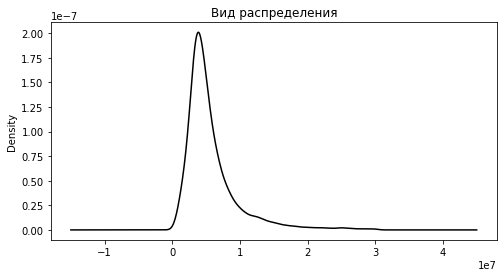

In [ ]:
histogram('last_price', 'Гистограмма распределения цены квартиры, руб.', (0, 30000000))
data.query('0<=last_price<=30000000')['last_price'].plot(kind = 'kde', color = 'Black', figsize = (8,4))
plt.title('Вид распределения')


Мы видим распределение, примерно близкое к распределению Пуассона.

Построим гистограмму распределения цены квадратного метра:

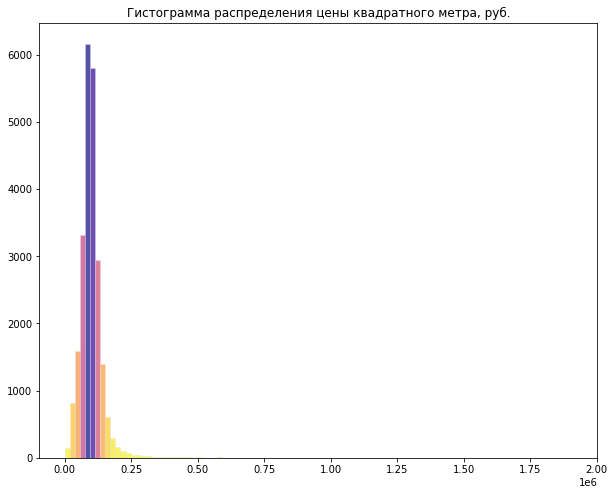

In [ ]:
histogram('sq_meter_cost', 'Гистограмма распределения цены квадратного метра, руб.')

Ограничим график значением 300 000:

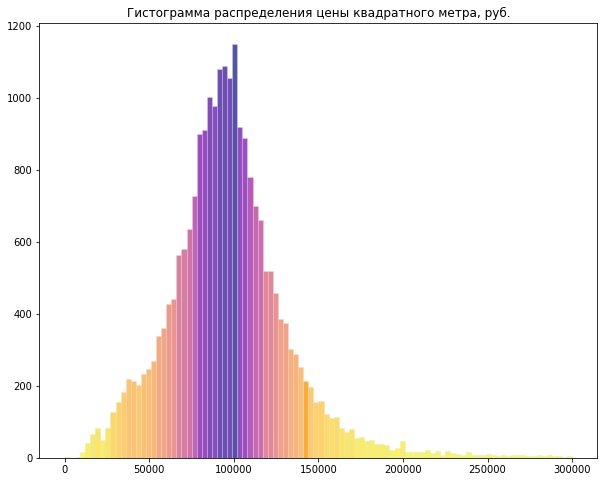

Text(0.5, 1.0, 'Вид распределения (пунктир - нормальное)')

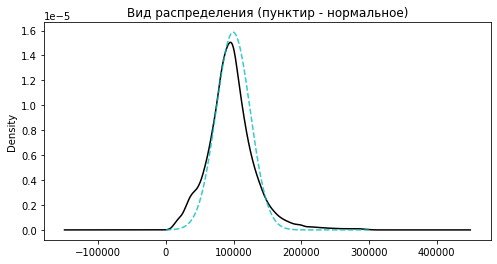

In [ ]:

histogram('sq_meter_cost', 'Гистограмма распределения цены квадратного метра, руб.', (0, 0.3*1e6))
data.query('0<=sq_meter_cost<=0.3*1e6')['sq_meter_cost'].plot(kind = 'kde', color = 'Black', figsize = (8,4))

from scipy.stats import norm 
norm1 = norm.pdf(range(0, 300000),data['sq_meter_cost'].mean(),data['sq_meter_cost'].std()/2)
plt.plot(norm1, 'c--', alpha = 0.8)
plt.title('Вид распределения (пунктир - нормальное)')

Мы видим распределение, примерно близкое к нормальному.

Посмотрим на гистограмме, как распределяется число комнат.

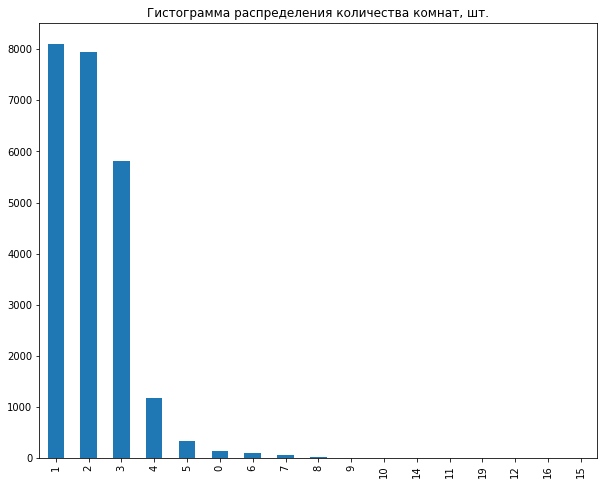

In [ ]:
data['rooms'].value_counts().plot(kind = 'bar', title = 'Гистограмма распределения количества комнат, шт.', figsize = (10,8))


Мы видим график, напоминающий распределение Пуассона.

Построим гистограмму распределения высоты потолков:

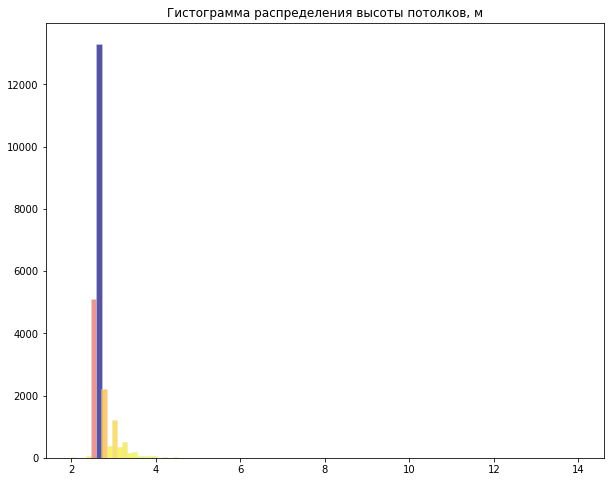

In [ ]:
histogram('ceiling_height', 'Гистограмма распределения высоты потолков, м')

Ограничим гистграмму значениями 2.5 снизу и 4 сверху:

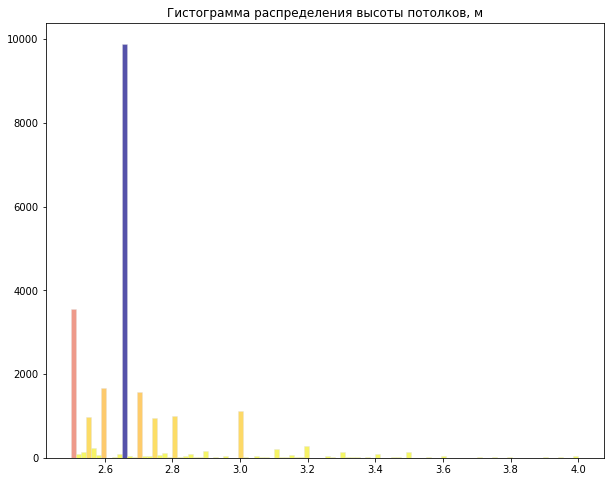

In [ ]:
histogram('ceiling_height', 'Гистограмма распределения высоты потолков, м', (2.5, 4))

Мы снова наблюдаем много "горбов" на графике (мультимодальность). Это связано с тем, что существуют стандарты высот потолков.

Попробуем описать портрет "типичной квартиры" с наиболее встречающимися параметрами.

Найдем наиболее встречающиеся параметры числа комнат, типа дома(числа этажей), площади, высоты потолков, цены:

In [ ]:
print('Наиболее встречающееся число комнат:', data['rooms'].value_counts().head(1))

print('Наиболее встречающееся количество этажей дома:', data['floors_total'].value_counts().head(1))

print('Наиболее встречающаяся общая площадь, м2:', data['total_area'].value_counts().head(1))
print('Наиболее встречающаяся жилая площадь, , м2:', data['living_area'].value_counts().head(1))
print('Наиболее встречающееся отношение жилой площади к общей площади:', data['living_per_total'].value_counts().head(1))
print('Наиболее встречающаяся площадь кухни, м2:', data['kitchen_area'].value_counts().head(1))
print('Наиболее встречающееся отношение площади кухни к общей площади:', data['kitchen_per_total'].value_counts().head(1))


print('Наиболее встречающаяся высота потолков, м:', data['ceiling_height'].value_counts().head(1))

print('Наиболее встречающаяся цена, руб.:', data['last_price'].value_counts().head(1))
print('Наиболее встречающаяся цена квадратного метра, руб.:', data['sq_meter_cost'].value_counts().head(1))

Наиболее встречающееся число комнат: 1    8106
Name: rooms, dtype: int64
Наиболее встречающееся количество этажей дома: 5.0000    5788
Name: floors_total, dtype: int64
Наиболее встречающаяся общая площадь, м2: 45.0000    419
Name: total_area, dtype: int64
Наиболее встречающаяся жилая площадь, , м2: 18.0000    882
Name: living_area, dtype: int64
Наиболее встречающееся отношение жилой площади к общей площади: 0.4834    664
Name: living_per_total, dtype: int64
Наиболее встречающаяся площадь кухни, м2: 6.0000    1300
Name: kitchen_area, dtype: int64
Наиболее встречающееся отношение площади кухни к общей площади: 0.2478    895
Name: kitchen_per_total, dtype: int64
Наиболее встречающаяся высота потолков, м: 2.6500    9874
Name: ceiling_height, dtype: int64
Наиболее встречающаяся цена, руб.: 4500000.0000    342
Name: last_price, dtype: int64
Наиболее встречающаяся цена квадратного метра, руб.: 100000.0000    259
Name: sq_meter_cost, dtype: int64


Мы нашли наиболее встреающиеся параметры некой усредненной квартиры. В реальности эти параметры связаны друг с другом. Попробуем их связать и найти реальную типичную квартиру. Посмотрим, какое наиболее частое сочетание числа этажей и количества комнат:

In [ ]:
data.groupby('floors_total')['rooms'].value_counts().sort_values(ascending = False).head(10)

floors_total  rooms
5.0000        2        2318
              3        1496
              1        1434
9.0000        2        1249
              3        1184
              1        1127
16.0000       1         613
25.0000       1         519
12.0000       1         511
10.0000       1         458
Name: rooms, dtype: int64

Мы видим, что наиболее частое сочетание - двухкомнатная квартира в пятиэтажке, не смотря на то, что в целом в датасете больше квартир однакомнатных. Рассмотрим остальные наиболее встречающиеся параметры для двухкомнатной квартиры в пятиэтажке:

In [ ]:
print('Общая площадь, м2:', data.query('rooms == 2 and floors_total == 5')['total_area'].value_counts().head(1))
print('Жилая площадь, , м2:', data.query('rooms == 2 and floors_total == 5')['living_area'].value_counts().head(1))
print('Отношение жилой площади к общей площади:', data.query('rooms == 2 and floors_total == 5')['living_per_total'].value_counts().head(1))
print('Площадь кухни, м2:', data.query('rooms == 2 and floors_total == 5')['kitchen_area'].value_counts().head(1))
print('Отношение площади кухни к общей площади:', data.query('rooms == 2 and floors_total == 5')['kitchen_per_total'].value_counts().head(1))


print('Высота потолков, м:', data.query('rooms == 2 and floors_total == 5')['ceiling_height'].value_counts().head(1))

print('Цена, руб.:', data.query('rooms == 2 and floors_total == 5')['last_price'].value_counts().head(1))

Общая площадь, м2: 45.0000    175
Name: total_area, dtype: int64
Жилая площадь, , м2: 30.0000    206
Name: living_area, dtype: int64
Отношение жилой площади к общей площади: 0.5850    187
Name: living_per_total, dtype: int64
Площадь кухни, м2: 6.0000    343
Name: kitchen_area, dtype: int64
Отношение площади кухни к общей площади: 0.1611    199
Name: kitchen_per_total, dtype: int64
Высота потолков, м: 2.6500    907
Name: ceiling_height, dtype: int64
Цена, руб.: 4000000.0000    49
Name: last_price, dtype: int64


Мы создали портрет типичной двухкомнатной квартиры в пятиэтажке, это наиболее встречающийся тип квартир. Как видим, параметры типичной квартиры - двухкомнатной в пятиэтажке несколько отличаются от наиболее встрчающихся по всему датасету.


#### Вывод

- Мы изучили следующие параметры: площадь, цена, число комнат, высота потолков. Построили гистограммы для каждого параметра.

 - На гистограммах, описывающих площадь и высоту потолков, наблюдается мультимодальность. Это связано с тем, что существуют стандарты площадей и высот потолков.

 - Цена и число комнат приблизительно описываются распределением Пуассона, цена одного квадратного метра - нормальным распределением.
 
 - Мы создали портрет самой типичной квартиры - двухкомнатной квартиры в пятиэтажке:
  - Общая площадь, м2: 45.0
  - Жилая площадь, , м2: 30.0
  - Отношение жилой площади к общей площади: 0.585009 
  - Площадь кухни, м2: 6.0
  - Отношение площади кухни к общей площади: 0.161075
  - Высота потолков, м: 2.65    907
  - Цена, руб.: 4 000 000  

#### Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Мы не будем учитывать нулевые значения - наши бывшие "пропуски":

In [ ]:
print('Статистики параметра days_exposition\n', data.query('days_exposition>0')['days_exposition'].describe())

Статистики параметра days_exposition
 count   20518.0000
mean      180.8886
std       219.7280
min         1.0000
25%        45.0000
50%        95.0000
75%       232.0000
max      1580.0000
Name: days_exposition, dtype: float64


Построим гистограмму распределения времени продажи квартиры.

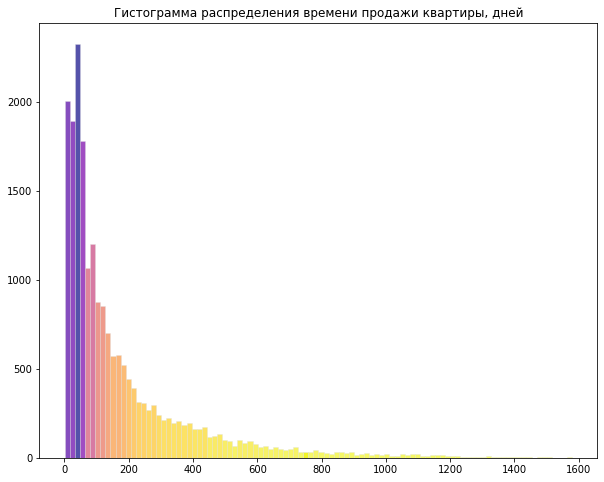

In [ ]:
histogram('days_exposition', 'Гистограмма распределения времени продажи квартиры, дней', data = data.query('days_exposition>0'))

Ограничим гистограмму значением 900, т.к. больших этого значений очень мало.

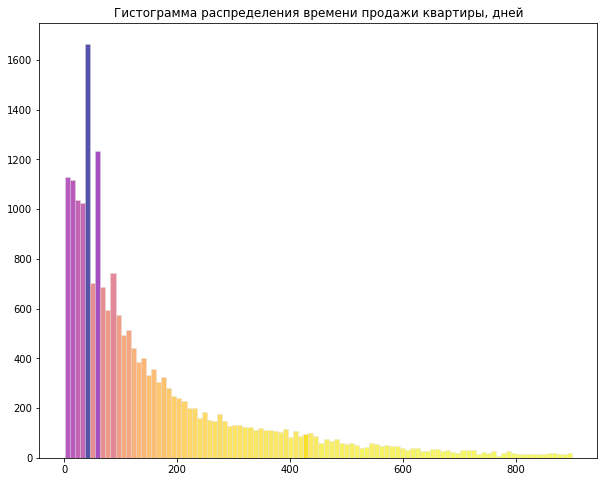

In [ ]:
histogram('days_exposition', 'Гистограмма распределения времени продажи квартиры, дней',(1, 900), data.query('days_exposition>0'))

Мы видим, что медиана и среднее значение существенно отличаются. Поскольку мы видим несколько пиков на гистограмме, медиана может не вполне хорошо описывать данный случай. И мы будем отталкиваться от среднего значения: считать, обычно продажа обычно занимает 181 день.

Text(0.5, 1.0, 'Распределение времени продажи квартиры, дней')

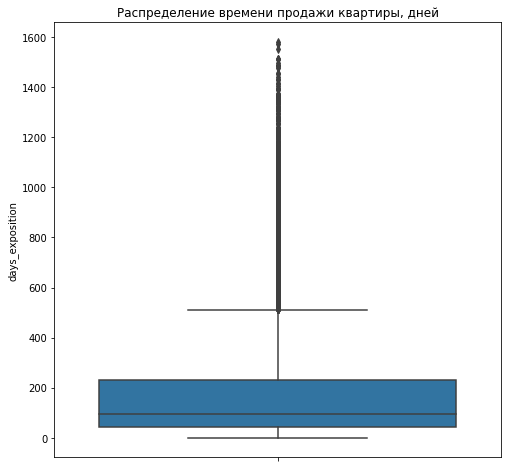

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(y=data.query('days_exposition>0')['days_exposition'])
plt.title('Распределение времени продажи квартиры, дней')

На графике boxplot мы видим, что значений, выходящих за рамки 4 квартиля, очень много.

Гладя на 1 и 3 квартили, мы можем сказать, что продажи шли слишком быстро, если они закончились за 45 дней, слишком долго, если они закончились за более чем 232 дня.

Попробуем узнать, из-за чего возникли пики на гистограмме распределения времени продажи. Найдем такие пики:

In [ ]:
data.query('days_exposition>0')['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
807       1
871       1
951       1
999       1
1223      1
Name: days_exposition, Length: 1141, dtype: int64

Мы видим, что большинство пиков составляют "быстрые продажи". Возможно, появление пиков связано с контрактами с сервисом размещения объявлений на определенный срок.

#### Вывод

- Мы изучили время продажи квартиры. 

- Построили гистограмму. Посчитали среднее и медиану. 

- Обычно продажа занимает 181 день. 

- Мы можем сказать, что продажи шли слишком быстро, если они закончились за 45 дней, слишком долго, если они закончились за более чем 232 дня.

- Мы установили, что встречаются пиковые значения на гистограмме времени продаж, большая их часть лежит в области быстрых продаж, максимальный пик приходится на 45 дней. Это может быть связано с особенностями работы сервиса по размещению объявлений (платные, бесплатные подписки на определенный срок).

#### Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

In [ ]:
def ranking(y, title=''):
    y_pos = np.arange(len(y),0,-1)
    plt.figure(figsize=(10,10))
    #cmap = ['plasma']
    cmap = ListedColormap(sns.color_palette("GnBu_d"))
    bar_colors = cmap(y.values/y.max())
    plt.barh(y_pos, width=y, height=0.6, left=None, align='center', color=bar_colors, alpha = 0.8)
    plt.yticks(y_pos, y.index)
    plt.title(title)
    for p, c, ch in zip(y_pos, y.index, round(y,4)):
        plt.annotate(str(ch), xy=(ch if ch>0 else 0, p), va='center')    

Корреляции цены квадратного метра
 sq_meter_cost          1.0000
last_price             0.7365
kitchen_area           0.3746
total_area             0.3020
ceiling_height         0.2676
living_area            0.2308
ponds_around3000       0.1910
parks_around3000       0.1852
floors_total           0.1481
floor_type             0.1469
kitchen_per_total      0.1406
total_images           0.1328
floor                  0.1291
rooms                  0.0559
balcony                0.0234
days_exposition        0.0203
studio                 0.0156
year                   0.0085
open_plan              0.0083
parks_nearest          0.0069
is_apartment           0.0064
month                 -0.0020
weekday               -0.0073
airports_nearest      -0.0440
ponds_nearest         -0.1050
living_per_total      -0.1396
cityCenters_nearest   -0.3180
Name: sq_meter_cost, dtype: float64


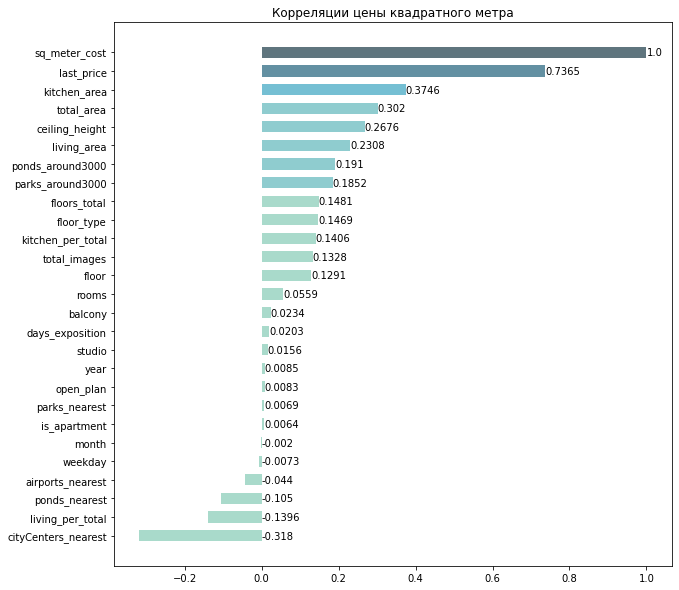

In [ ]:
print('Корреляции цены квадратного метра\n', data.corr()['sq_meter_cost'].sort_values(ascending = False))
ranking(data.corr()['sq_meter_cost'].sort_values(ascending = False), 'Корреляции цены квадратного метра')

Мы видим, что максимальные корреляции цены квадратного метра - с общей стоимостью (это логично), общей площадью, высотой потолков, жилой площадью и площадью кухни, удаленностью от центра, количеством парков и водоемо в окрестности 3 км и их удаленностью, количеством этажей в доме и этажом квартиры, типом этажа, количеством фотографий. 

Построим гистограммы, которые мы еще не строили, и отфильтруем все параметры по тем значениям, которых на гистограммах мало. Результат запишем в новую таблицу `data_filtered`.

<div class="alert alert-block alert-info">
<b>Построем функцию `histogram`, рисующую гистограммы, и воспользуемся ей:</b>
</div>

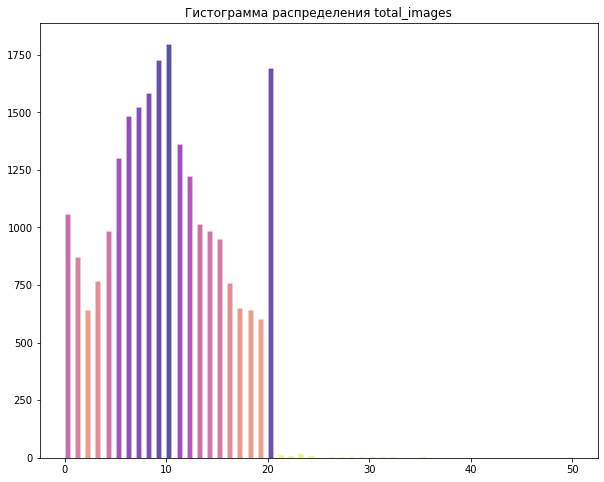

In [ ]:
histogram('total_images')


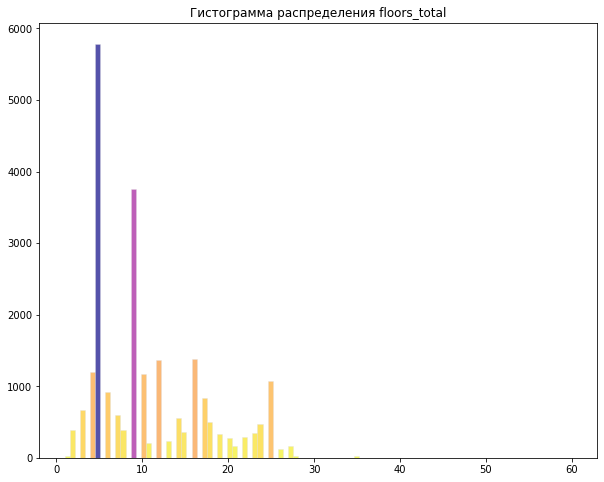

In [ ]:
histogram('floors_total')

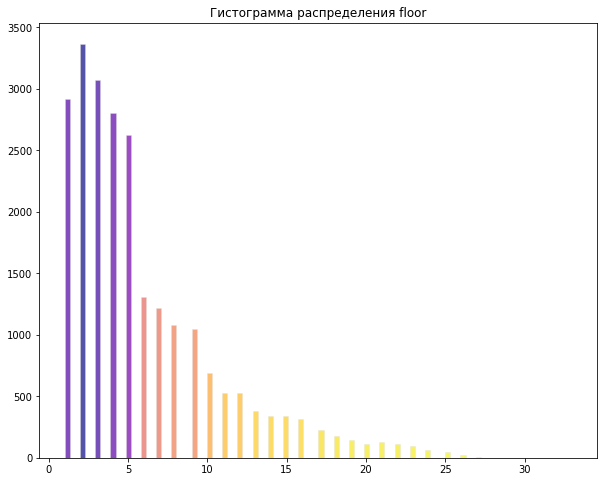

In [ ]:
histogram('floor')

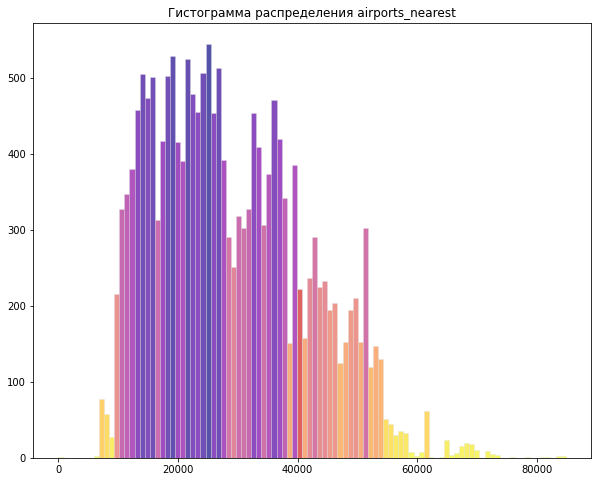

In [ ]:
histogram('airports_nearest')

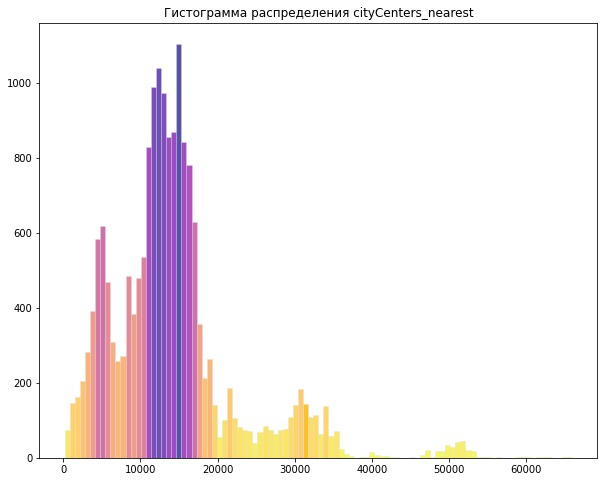

In [ ]:
histogram('cityCenters_nearest')

In [ ]:
data_filtered = data.query('total_images <=total_images.quantile(0.999)')
data_filtered = data_filtered.query('last_price.quantile(0.001)<=last_price <=last_price.quantile(0.999)')
data_filtered = data_filtered.query('rooms <=rooms.quantile(0.999)')
data_filtered = data_filtered.query('ceiling_height.quantile(0.001) <= ceiling_height <= ceiling_height.quantile(0.999)')
data_filtered = data_filtered.query('floors_total <= floors_total.quantile(0.999)')
data_filtered = data_filtered.query('living_area.quantile(0.001)<=living_area <= living_area.quantile(0.999)')
data_filtered = data_filtered[data_filtered['floor']<=data_filtered['floor'].quantile(0.999)]
data_filtered = data_filtered.query('kitchen_area.quantile(0.001)<=kitchen_area <= kitchen_area.quantile(0.999)')
data_filtered = data_filtered.query('airports_nearest.quantile(0.001) <= airports_nearest <= airports_nearest.quantile(0.999)')
data_filtered = data_filtered.query('days_exposition <= days_exposition.quantile(0.999)')
data_filtered = data_filtered.query('living_per_total.quantile(0.001)<= living_per_total <= living_per_total.quantile(0.999)')
data_filtered = data_filtered.query('kitchen_per_total.quantile(0.001)<= kitchen_per_total <= kitchen_per_total.quantile(0.999)')
data_filtered = data_filtered.query('sq_meter_cost <= sq_meter_cost.quantile(0.999)')

Посмотрим, какой процент данных был исключен:

In [ ]:
print('Было исключено {:.0%} данных.'.format(1-data_filtered.shape[0]/data.shape[0]))

Было исключено 25% данных.


Вычислим корреляции цены квадратного метра с другими параметрами до и после фильтрации, сравним:

In [ ]:
print('Корреляции цены квадратного метра - до фильтрации\n', data.corr()['sq_meter_cost'].sort_values(ascending = False))
print()
print('Корреляции цены квадратного метра - после фильтрации\n', data_filtered.corr()['sq_meter_cost'].sort_values(ascending = False))

Корреляции цены квадратного метра - до фильтрации
 sq_meter_cost          1.0000
last_price             0.7365
kitchen_area           0.3746
total_area             0.3020
ceiling_height         0.2676
living_area            0.2308
ponds_around3000       0.1910
parks_around3000       0.1852
floors_total           0.1481
floor_type             0.1469
kitchen_per_total      0.1406
total_images           0.1328
floor                  0.1291
rooms                  0.0559
balcony                0.0234
days_exposition        0.0203
studio                 0.0156
year                   0.0085
open_plan              0.0083
parks_nearest          0.0069
is_apartment           0.0064
month                 -0.0020
weekday               -0.0073
airports_nearest      -0.0440
ponds_nearest         -0.1050
living_per_total      -0.1396
cityCenters_nearest   -0.3180
Name: sq_meter_cost, dtype: float64

Корреляции цены квадратного метра - после фильтрации
 sq_meter_cost          1.0000
last_price        

<div class="alert alert-block alert-info">
<b>Сравним на графике:</b>
</div>

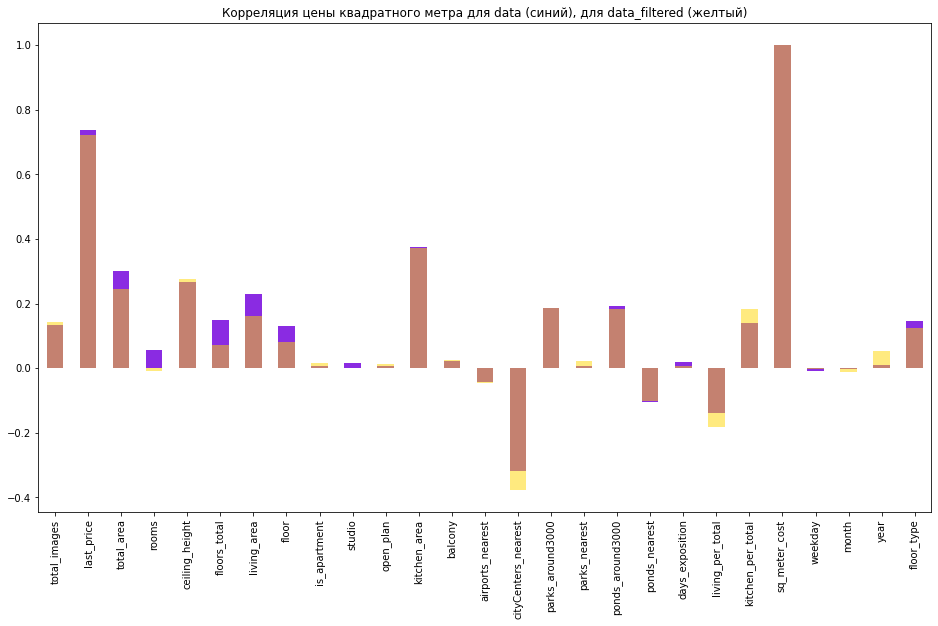

In [ ]:
data.corr()['sq_meter_cost'].plot(kind='bar', title= '', color ='BlueViolet', figsize = (16,9))
data_filtered.corr()['sq_meter_cost'].plot(kind='bar', title= 'Корреляция цены квадратного метра для data (синий), для data_filtered (желтый)', color ='Gold', alpha = 0.5, figsize = (16,9))

<div class="alert alert-block alert-info">
<b>Вычислим разность корреляций по всем данным и по фильтрованным данным и составим рейтинг изменений:</b>
</div>

In [ ]:
print('Рейтинг изменения корреляции цены квадратного метра (значения по модулю)\n',abs(data_filtered.corr()['sq_meter_cost'] - data.corr()['sq_meter_cost']).sort_values(ascending = False).head(10))


Рейтинг изменения корреляции цены квадратного метра (значения по модулю)
 floors_total          0.0775
living_area           0.0698
rooms                 0.0632
cityCenters_nearest   0.0590
total_area            0.0554
floor                 0.0469
year                  0.0457
kitchen_per_total     0.0416
living_per_total      0.0414
floor_type            0.0231
Name: sq_meter_cost, dtype: float64


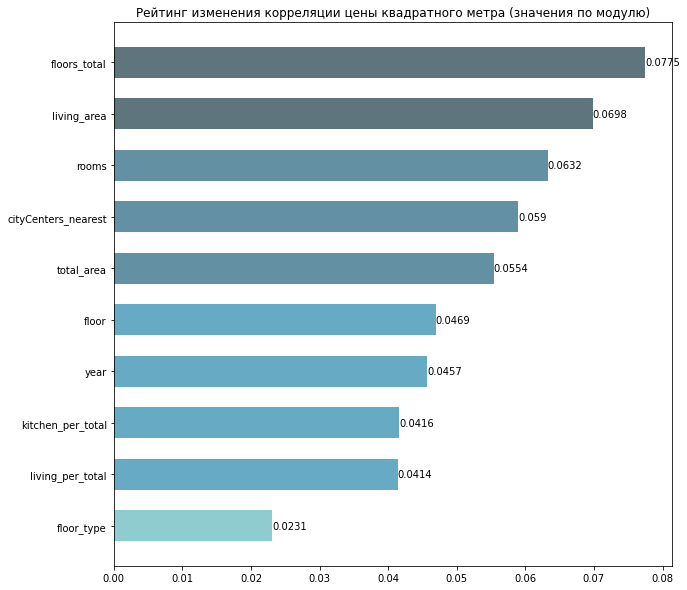

In [ ]:
ranking(abs(data_filtered.corr()['sq_meter_cost'] - data.corr()['sq_meter_cost']).sort_values(ascending = False).head(10),title = 'Рейтинг изменения корреляции цены квадратного метра (значения по модулю)')

Мы видим, что для многих параметров корреляция изменилась. 
- Жилая площадь и общая площадь стали значительно меньше влиять на цену квадратного метра
- Количество комнат стало влиять больше и теперь корреляция стала отрицательной (изменила знак)
- Отношение жилой площади к общей площади и площади кухни к общей площади стало больше влиять на цену квадратного метра
- Удаленность от центра стала больше влиять
- Удаленность от парков стала больше влиять
- Площадь кухни стала меньше влиять

#### Вывод

Мы убрали редкие и выбивающиеся значения. Было исключено 28% данных. Обнаружили, что корреляция цены квадратного метра с прочими параметрами стала другой.

#### Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

Создадим рейтинг влияющих факторов.

In [ ]:
print('Рейтинг корреляции цены квадратного метра (значения по модулю)\n', abs(data_filtered.corr()['sq_meter_cost']).sort_values(ascending = False).head(12))

Рейтинг корреляции цены квадратного метра (значения по модулю)
 sq_meter_cost         1.0000
last_price            0.7207
cityCenters_nearest   0.3769
kitchen_area          0.3726
ceiling_height        0.2760
total_area            0.2466
parks_around3000      0.1871
ponds_around3000      0.1847
kitchen_per_total     0.1822
living_per_total      0.1809
living_area           0.1610
total_images          0.1429
Name: sq_meter_cost, dtype: float64


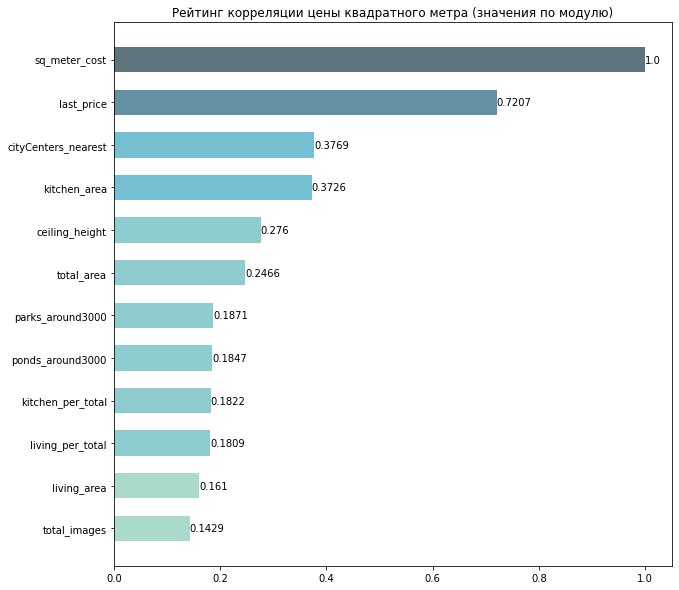

In [ ]:
ranking(abs(data_filtered.corr()['sq_meter_cost']).sort_values(ascending = False).head(12), 'Рейтинг корреляции цены квадратного метра (значения по модулю)')

На цену квадратного метра больше всего влияют: удаленность от центра, площадь кухни, высота потолков, отношение площади кухни к общей площади, отношение жилой площади к общей площади, тип этажа, расстояние до ближайшего парка, количество фотографий, количество прудов и парков в радиусе 3 км. 

Изучим, зависит ли цена от площади.

In [ ]:
print('Коэффициент корреляции цены квадратного метра с общей площадью\n', data_filtered['sq_meter_cost'].corr(data_filtered['total_area']))

Коэффициент корреляции цены квадратного метра с общей площадью
 0.24657228117937136


Коэффициент корреляции с общей площадью небольшой. Это означает, что есть небольшая зависимость цены квадратного метра от общей площади. Попробуем разглядеть эту зависимость на графике:

Text(0.5, 1.0, 'Зависимость цены квадратного метра от общей площади')

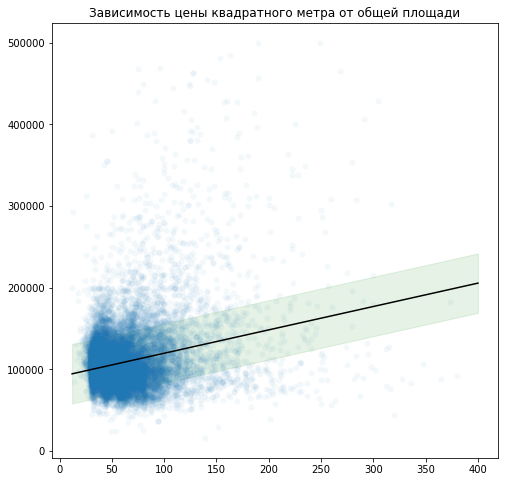

In [ ]:
plt.figure(figsize = (8,8))

x = data_filtered['total_area']
y = data_filtered['sq_meter_cost']
plt.plot(x, y, 'o', mec='none', alpha=.05)

# the raw data



params = np.polyfit(x, y, 1)
xp = np.linspace(x.min(), 400, 400)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k')

#overplot an error band
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='green', alpha=0.1)

plt.title('Зависимость цены квадратного метра от общей площади')


Как видим, нет линейной зависимости, но можно разглядеть некоторые тренды. 

Изучим, зависит ли цена (квадратного метра) от количества комнат.

In [ ]:
print('Коэффициент корреляции цены квадратного метра с количеством комнат\n', data_filtered['sq_meter_cost'].corr(data_filtered['rooms']))

Коэффициент корреляции цены квадратного метра с количеством комнат
 -0.007380601666806162


Коэффициент корреляции отрицателен, это значит, что цена метра убывает с ростом количества комнат. Посмотрим на график:

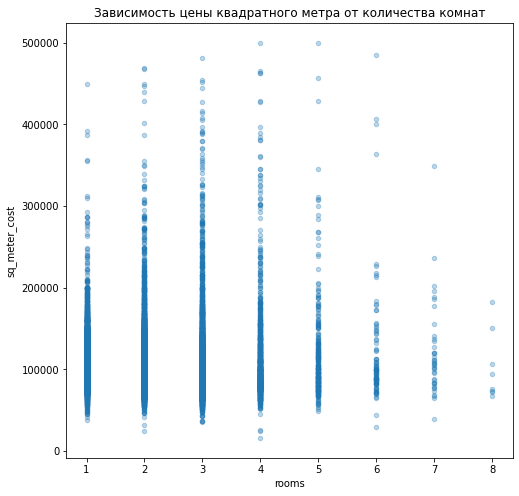

In [ ]:
data_filtered.plot(x = 'rooms', y = 'sq_meter_cost', kind = 'scatter', figsize = (8,8), alpha = 0.3, title = 'Зависимость цены квадратного метра от количества комнат')

Как видно, это происходит для многокомнатных квартир. С ростом числа комнат средняя цена квадратного метра уменьшается, и разброс цен тоже уменьшается.

Изучим зависимость цены квадратного метра от удаленности от центра. Возьмем данные в разрезе одного города, чтобы нам было проще увидеть зависимость на графике:

In [ ]:
print('Коэффициент корреляции цены квадратного метра с удаленностью от центра Санкт-Петербурга\n',data_filtered.query('locality_name == "Санкт-Петербург"')['sq_meter_cost'].corr(data_filtered.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest']))

Коэффициент корреляции цены квадратного метра с удаленностью от центра Санкт-Петербурга
 -0.351970678117976


Коэффициент корреляции достаточно высок относительно нашей задачи. Он отрицательный - при удалении от центра цена падает.

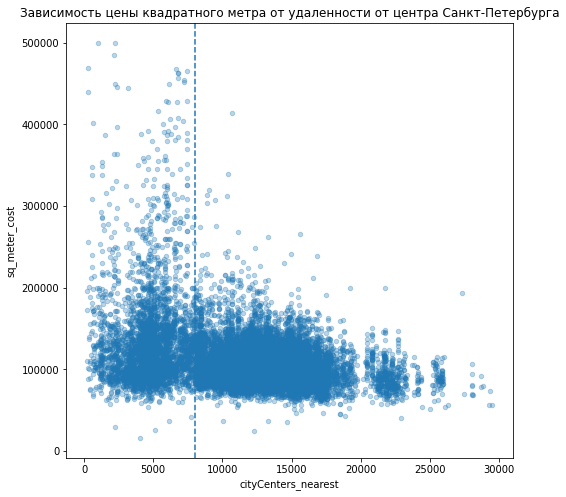

In [ ]:
data_filtered.query('locality_name == "Санкт-Петербург"').plot(x = 'cityCenters_nearest', y = 'sq_meter_cost', kind = 'scatter', figsize = (8,8), alpha = 0.3, title = 'Зависимость цены квадратного метра от удаленности от центра Санкт-Петербурга')
plt.axvline(8000, ls = '--')

Мы видим, что данные распределены по-разному для разных промежутков удаленности от центра. И Ближе к центру происходит скачек цен. 

Изучим зависимость от типа этажа (первый, последний, другой)

In [ ]:
print('Коэффициент корреляции цены квадратного метра от типа этажа\n',data_filtered['sq_meter_cost'].corr(data_filtered['floor_type']))

Коэффициент корреляции цены квадратного метра от типа этажа
 0.12381638519162147


Построим график:

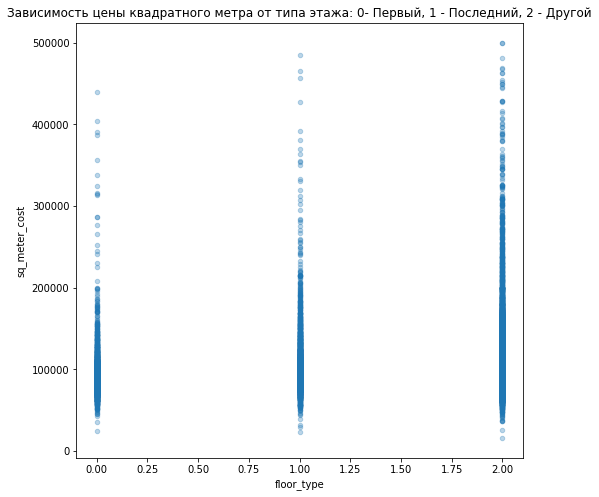

In [ ]:
data_filtered.plot(x = 'floor_type', y = 'sq_meter_cost', kind = 'scatter', figsize = (8,8), alpha = 0.3,title = 'Зависимость цены квадратного метра от типа этажа: 0- Первый, 1 - Последний, 2 - Другой')

Как видно, "первый" этаж самый дешевый, "другой" - самый комфортный и дорогой.

Изучим зависимость стоимости квадратного метра от дня недели:

In [ ]:
print('Коэффициент корреляции цены квадратного метра от дня недели\n',data_filtered['sq_meter_cost'].corr(data_filtered['weekday']))

Коэффициент корреляции цены квадратного метра от дня недели
 -0.0028678272144106805


Коэффициент корреляции очень небольшой, говорит о том, что к концу недели цена должна падать. Посмотрим график:

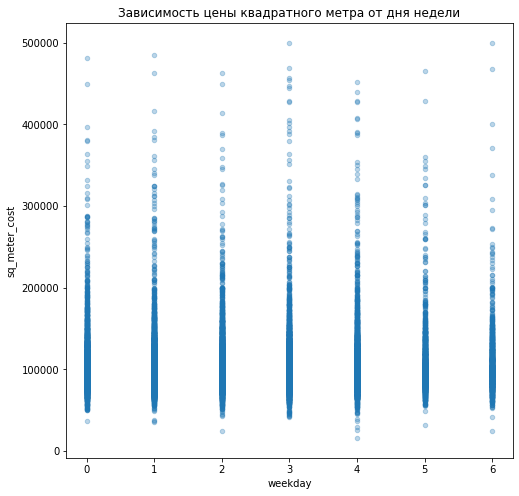

In [ ]:
data_filtered.plot(x = 'weekday', y = 'sq_meter_cost', kind = 'scatter', figsize = (8,8), alpha = 0.3, title = 'Зависимость цены квадратного метра от дня недели')

И на графике мы видим, что цена уменьшается к концу недели. 

Изучим зависимость от месяца подачи объявления.

In [ ]:
print('Коэффициент корреляции цены квадратного метра от месяца\n', data_filtered['sq_meter_cost'].corr(data_filtered['month']))

Коэффициент корреляции цены квадратного метра от месяца
 -0.01247697609362734


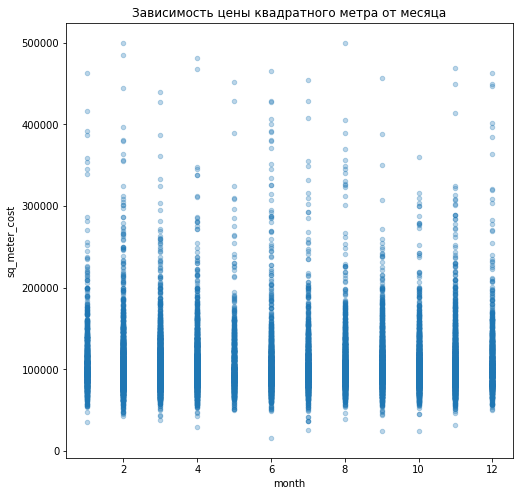

In [ ]:
data_filtered.plot(x = 'month', y = 'sq_meter_cost', kind = 'scatter', figsize = (8,8), alpha = 0.3, title = 'Зависимость цены квадратного метра от месяца')

Как видим, на графике все хаотично, и зависимости скорее всего нет.

Изучим зависимость цены от года подачи объявления.

In [ ]:
print('Коэффициент корреляции цены квадратного метра от года\n',data_filtered['sq_meter_cost'].corr(data_filtered['year']))

Коэффициент корреляции цены квадратного метра от года
 0.0542066475131222


Здесь коэффициент корреляции имеет большее значение, чем для месяца и дня недели. Посмотрим, как это выглядит на графике:

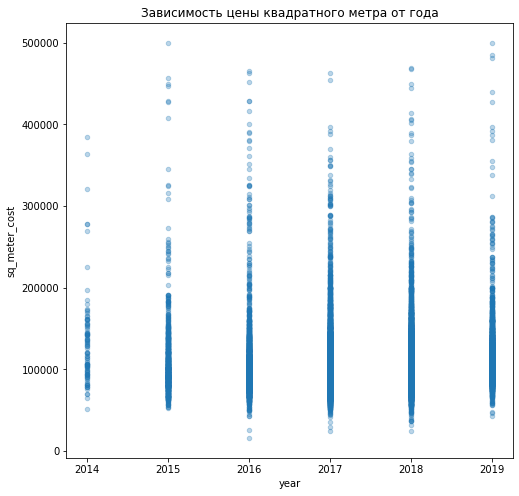

In [ ]:
data_filtered.plot(x = 'year', y = 'sq_meter_cost', kind = 'scatter', figsize = (8,8), alpha = 0.3, title = 'Зависимость цены квадратного метра от года')

Видно, что с 2014 по 2017 год цена квадратного метра росла, после 2017 немного падает.

#### Вывод

 - Мы ответили на вопрос: какие факторы больше всего влияют на стоимость квартиры? 
На цену квадратного метра больше всего влияют: удаленность от центра, площадь кухни, высота потолков, отношение площади кухни к общей площади, отношение жилой площади к общей площади, тип этажа, расстояние до ближайшего парка, количество фотографий, количество прудов и парков в радиусе 3 км.
 
- Мы изучили, зависит ли цена от площади, числа комнат, удалённости от центра.
Цена квадратного метра жилья зависит от площади (увеличивается с ростом площади), зависит от числа комнат (падает для многокомнатных квартир), зависит от удаленности от центра (сильно увеличивается при приближении к центру).


- Мы изучили зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
Цена первых этажей дешевле всего, цена "других" этажей самая высокая.


- Также изучили зависимость от даты размещения: дня недели, месяца и года.
Цена падает к концу недели, практически не зависит от месяца, росла с 2014 до 2017 года и немного падает после 2017 года.

#### Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

10 населённых пунктов с наибольшим числом объявлений:

In [ ]:
data_filtered['locality_name'].value_counts().head(10)

Санкт-Петербург      15303
посёлок Шушары         434
Пушкин                 363
Колпино                337
посёлок Парголово      320
Петергоф               201
Сестрорецк             179
Красное Село           174
Ломоносов              133
Кронштадт               95
Name: locality_name, dtype: int64

Список населённых пунктов:

In [ ]:
list = data_filtered['locality_name'].value_counts().head(10).index.tolist()

Средние цены для этих населенных пунктов:

In [ ]:
data.query('locality_name in (@list)').pivot_table(values = 'sq_meter_cost', index = 'locality_name', aggfunc = 'mean').sort_values(by = 'sq_meter_cost', ascending = False)

,sq_meter_cost
locality_name,
Санкт-Петербург,114849.0088
Пушкин,103125.8193
Сестрорецк,101757.6169
посёлок Парголово,90175.9135
Петергоф,84757.5597
Кронштадт,79714.4433
посёлок Шушары,78677.3642
Колпино,75424.5791
Ломоносов,72724.0467


In [ ]:
for column_value, column_slice in data.groupby('locality_name'):
  print(column_value)
  print(column_slice['sq_meter_cost'].mean())

Бокситогорск
17551.591818873803
Волосово
40183.32597350752
Волхов
35087.67987691856
Всеволожск
68654.47398603165
Выборг
58141.909153318615
Высоцк
35986.30450201128
Гатчина
68746.14676333923
Зеленогорск
115122.79919757204
Ивангород
32591.904362212277
Каменногорск
27969.167697836787
Кингисепп
46784.124045522265
Кириши
38875.77918486855
Кировск
57574.80218041706
Колпино
75424.57909803944
Коммунар
56740.60619347732
Красное Село
72148.58828878998
Кронштадт
79714.44325312089
Кудрово
100253.04330385603
Лодейное Поле
31769.410761597257
Ломоносов
72724.04674089287
Луга
41739.74904774846
Любань
35568.739217020186
Мурино
92722.7089143752
Никольское
57817.99884599556
Новая Ладога
37402.385223115874
Отрадное
57138.28845165388
Павловск
84067.0680767814
Петергоф
84757.5596895683
Пикалёво
18872.53454434783
Подпорожье
27014.59344523903
Приморск
41078.859968644996
Приозерск
40674.91774350892
Пушкин
103125.8192907219
Санкт-Петербург
114849.00879387358
Светогорск
34691.02285973949
Сертолово
69356.10579031

Самая высокая стоимость жилья - в Санкт-Петербурге и Пушкине, самая низкая - в Ломоносове и Красном Селе.

#### Вывод

- Мы выбрали 10 населённых пунктов с наибольшим числом объявлений. 
 - Посчитали среднюю цену квадратного метра в этих населённых пунктах. 
 - Самая высокая стоимость жилья - в Санкт-Петербурге и Пушкине, самая низкая - в Ломоносове и Красном Селе.

#### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в СанктПетербурге. .Задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

Создадим новый столбец с округленным расстоянием до центра в километрах. Рассчитаем изменение стоимости каждого километра и построим график.

Text(10, 140000, 'Граница центральной зоны')

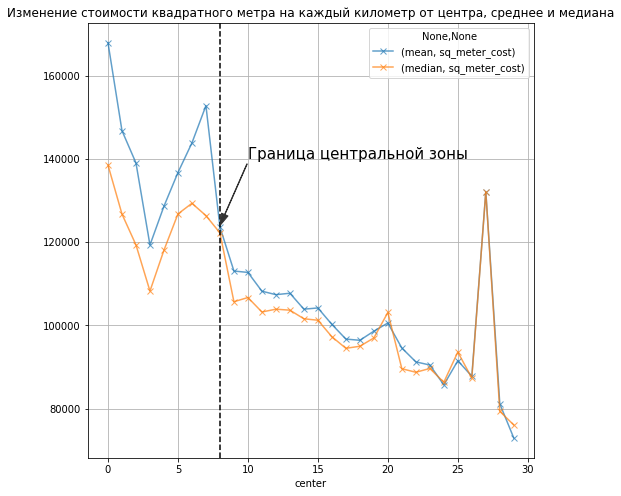

In [ ]:
data_filtered['center'] = round(data_filtered['cityCenters_nearest']/1000)

cost_per_km =  data_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(values = 'sq_meter_cost', index ='center', aggfunc = ['mean', 'median']) 
    
cost_per_km.plot(figsize = (8,8), style = 'x-', title = 'Изменение стоимости квадратного метра на каждый километр от центра, среднее и медиана', grid = True, alpha = 0.7)

plt.axvline(8, color = 'Black', ls = '--')

# Add annotation
plt.annotate('Граница центральной зоны', xy=(8, 124000), xytext=(10, 140000), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})

Как видим по графику, центральная зона заканчивается где-то на 8 километре от центра. Мы видим в этой области скачок стоимости квадратного метра жилья. 

#### Вывод

- Мы изучили предложения квартир. 
- Выяснили, какая область входит в центр. 
- Посчитали среднюю цену для каждого километра. 
- Определили по графику границу центральной зоны.

#### Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

Создадим новую таблицу `data_center`, где будут данные только о квартирах в центре Петербурга:

In [ ]:
data_center = data_filtered.query('(locality_name == "Санкт-Петербург") & center <= 8')

<div class="alert alert-block alert-info">
<b>Создадим функцию `piter_center`, которая будет выдавать статистики и boxplot для определенного столбца, и воспользуемся этой функцией:</b>
</div>

In [ ]:
def piter_center(row):
    print('По всем фильтрованным данным {}\n {}'.format(row, data_filtered[row].describe()))
    print()
    print('По центру Санкт-Петербурга {}\n {}'.format(row, data_center[row].describe()))
    plt.figure(figsize=(8, 8))
    sns.boxplot(data = [data_filtered[row], data_center[row]])
    plt.title('Boxplot "'+row+ '" 0 - По всем данным, 1 - По центру Санкт-Петербурга') 

По всем фильтрованным данным total_area
 count   17829.0000
mean       61.9798
std        32.3489
min        12.0000
25%        41.3000
50%        54.0000
75%        72.3000
max       380.0000
Name: total_area, dtype: float64

По центру Санкт-Петербурга total_area
 count   3940.0000
mean      85.4142
std       44.5595
min       12.0000
25%       54.6000
50%       75.0500
75%      103.8500
max      373.1000
Name: total_area, dtype: float64


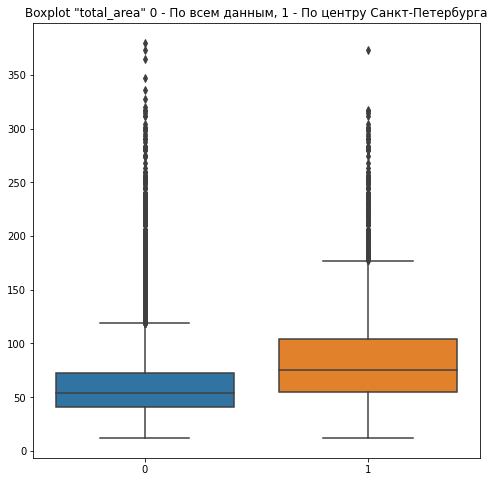

In [ ]:
piter_center('total_area')

Как видим, средняя площадь квартир в центре Петербурга больше, чем если рассматривать все данные.

По всем фильтрованным данным living_per_total
 count   17829.0000
mean        0.5649
std         0.1001
min         0.2360
25%         0.4957
50%         0.5714
75%         0.6341
max         0.9017
Name: living_per_total, dtype: float64

По центру Санкт-Петербурга living_per_total
 count   3940.0000
mean       0.5812
std        0.1067
min        0.2360
25%        0.5150
50%        0.5928
75%        0.6571
max        0.9017
Name: living_per_total, dtype: float64


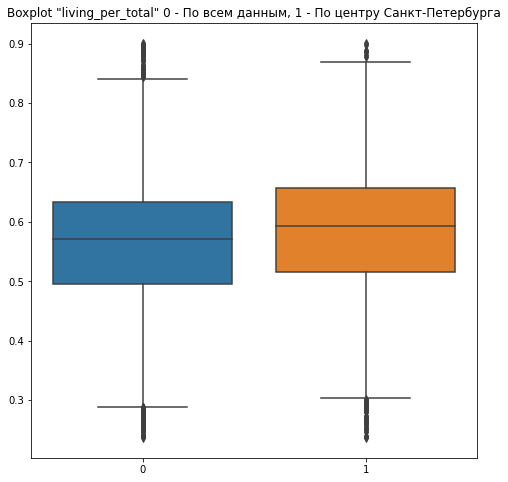

In [ ]:
piter_center('living_per_total')

Среднее отношение жилой площади к общей в центре Питера тоже немного больше.

По всем фильтрованным данным kitchen_per_total
 count   17829.0000
mean        0.1853
std         0.0691
min         0.0552
25%         0.1324
50%         0.1694
75%         0.2333
max         0.5357
Name: kitchen_per_total, dtype: float64

По центру Санкт-Петербурга kitchen_per_total
 count   3940.0000
mean       0.1725
std        0.0761
min        0.0552
25%        0.1197
50%        0.1528
75%        0.2073
max        0.5289
Name: kitchen_per_total, dtype: float64


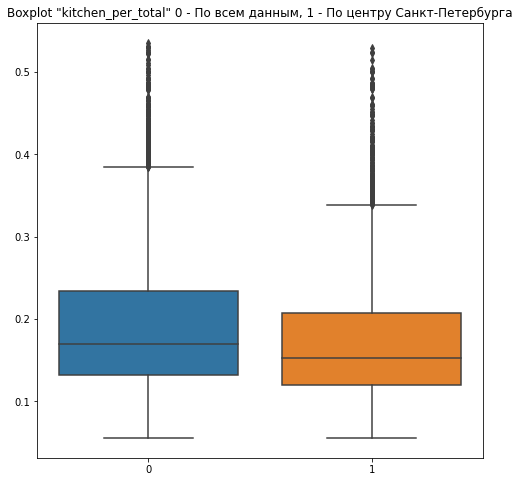

In [ ]:
piter_center('kitchen_per_total')

А вот соотношение площади кухни к общей в центре Питера в среднем немного меньше.

По всем фильтрованным данным sq_meter_cost
 count    17829.0000
mean    108816.0380
std      37546.0696
min      15861.5717
25%      87257.6177
50%     101428.5714
75%     120315.5819
max     500000.0000
Name: sq_meter_cost, dtype: float64

По центру Санкт-Петербурга sq_meter_cost
 count     3940.0000
mean    135449.4560
std      56952.2253
min      15861.5717
25%      99801.6156
50%     122531.8631
75%     151494.0295
max     500000.0000
Name: sq_meter_cost, dtype: float64


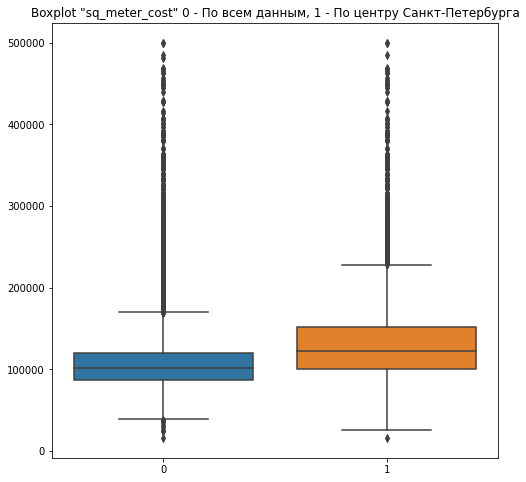

In [ ]:
piter_center('sq_meter_cost')

Средняя цена квадратного метра квартиры в центре Питера, очевидно, больше.

По всем фильтрованным данным rooms
 count   17829.0000
mean        2.1273
std         1.0493
min         1.0000
25%         1.0000
50%         2.0000
75%         3.0000
max         8.0000
Name: rooms, dtype: float64

По центру Санкт-Петербурга rooms
 count   3940.0000
mean       2.7000
std        1.2580
min        1.0000
25%        2.0000
50%        3.0000
75%        3.0000
max        8.0000
Name: rooms, dtype: float64


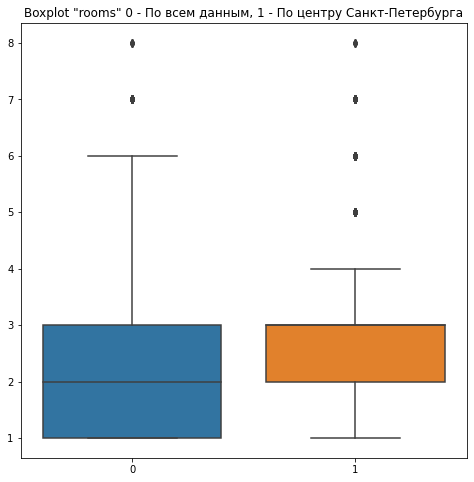

In [ ]:
piter_center('rooms')

Среднее количество комнат в центре Питера больше (меньше однокомнатных квартир).

По всем фильтрованным данным ceiling_height
 count   17829.0000
mean        2.7089
std         0.2252
min         2.4000
25%         2.6000
50%         2.6500
75%         2.7000
max         4.5000
Name: ceiling_height, dtype: float64

По центру Санкт-Петербурга ceiling_height
 count   3940.0000
mean       2.9040
std        0.3347
min        2.4000
25%        2.6500
50%        2.7550
75%        3.1000
max        4.5000
Name: ceiling_height, dtype: float64


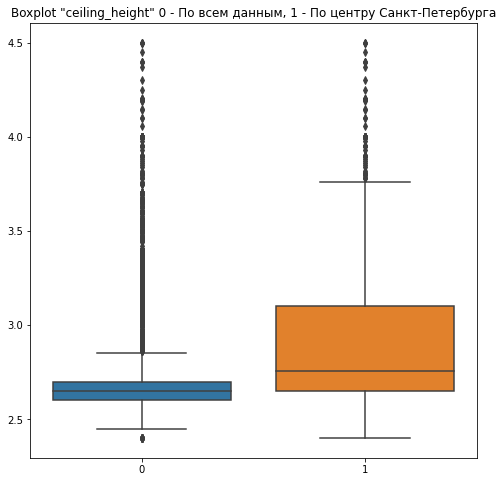

In [ ]:
piter_center('ceiling_height')

В центре Питера больше средняя высота потолков.

Посмотрим, как изменились корреляции цены квадратного метра с прочими параметрами в центре Питера:

In [ ]:
print('По всем фильтрованным данным корреляции\n ', data_filtered.corr()['sq_meter_cost'])
print()
print('По центру Санкт-Петербурга корреляции\n', data_center.corr()['sq_meter_cost'])

По всем фильтрованным данным корреляции
  total_images           0.1429
last_price             0.7207
total_area             0.2466
rooms                 -0.0074
ceiling_height         0.2760
floors_total           0.0706
living_area            0.1610
floor                  0.0822
is_apartment           0.0164
studio                 0.0017
open_plan              0.0126
kitchen_area           0.3726
balcony                0.0245
airports_nearest      -0.0458
cityCenters_nearest   -0.3769
parks_around3000       0.1871
parks_nearest          0.0235
ponds_around3000       0.1847
ponds_nearest         -0.1031
days_exposition        0.0080
living_per_total      -0.1809
kitchen_per_total      0.1822
sq_meter_cost          1.0000
weekday               -0.0029
month                 -0.0125
year                   0.0542
floor_type             0.1238
center                -0.3776
Name: sq_meter_cost, dtype: float64

По центру Санкт-Петербурга корреляции
 total_images           0.1678
last_price  

<div class="alert alert-block alert-info">
<b>Сравним на графике:</b>
</div>

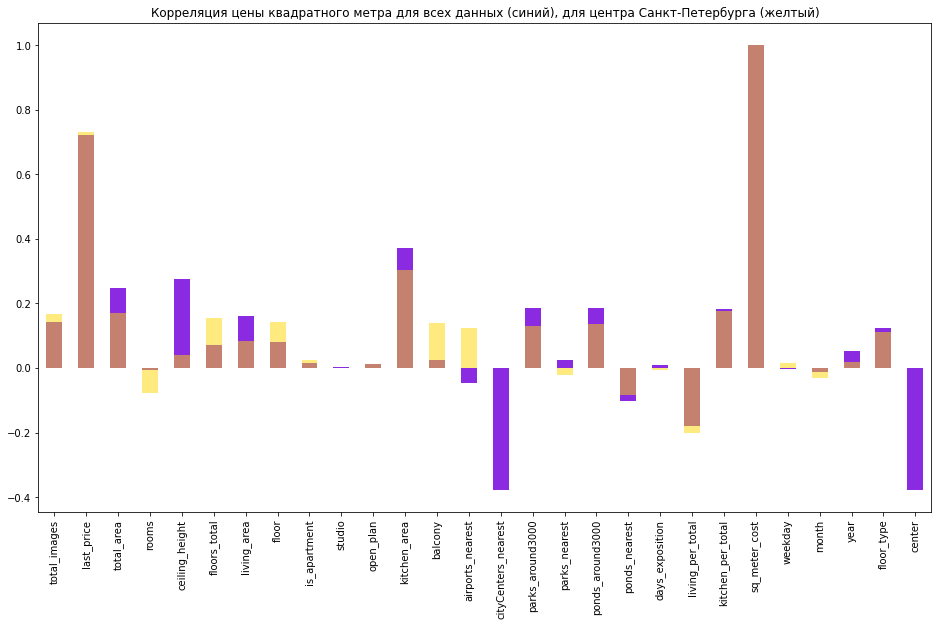

In [ ]:
data_filtered.corr()['sq_meter_cost'].plot(kind='bar', title= '', color ='BlueViolet', figsize = (16,9))
data_center.corr()['sq_meter_cost'].plot(kind='bar', title= 'Корреляция цены квадратного метра для всех данных (синий), для центра Санкт-Петербурга (желтый)', color ='Gold', alpha = 0.5, figsize = (16,9))

Вычислим разность корреляций по всем данным и по центру Питера и составим рейтинг изменений:

In [ ]:
print('Рейтинг изменения корреляции цены квадратного метра (значения по модулю)\n', abs(data_filtered.corr()['sq_meter_cost'] - data_center.corr()['sq_meter_cost']).sort_values(ascending = False).head(10))


Рейтинг изменения корреляции цены квадратного метра (значения по модулю)
 center                0.3771
cityCenters_nearest   0.3769
ceiling_height        0.2346
airports_nearest      0.1687
balcony               0.1135
floors_total          0.0837
living_area           0.0781
total_area            0.0747
rooms                 0.0698
kitchen_area          0.0692
Name: sq_meter_cost, dtype: float64


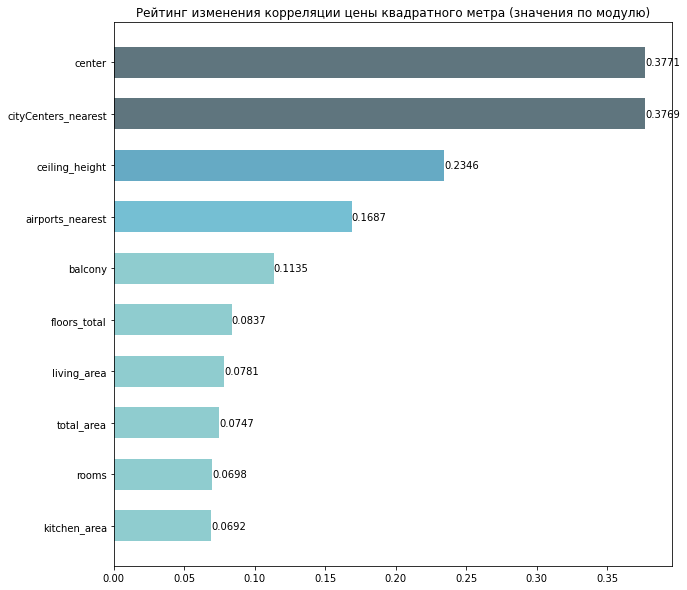

In [ ]:
y= abs(data_filtered.corr()['sq_meter_cost'] - data_center.corr()['sq_meter_cost']).sort_values(ascending = False).head(10)
ranking(y, title='Рейтинг изменения корреляции цены квадратного метра (значения по модулю)')


Мы видим, что: 
- удаленность от центра перестает существенно влиять на цену, когда квартира уже в центре. 
- Высота потолков существенно меньше влияет на стоимость квадратного метра в центре Петербурга.
- Влияние общей площади и жилой площади изменило знак, и теперь стоимость квадратного метра и общая площадь связаны отрицательно 
- Усилилось влияние аэропортов поблизости, и теперь связано со стоимостью положительно
- Число комнат больше стало влиять на стоимость
- Число балконов больше стало влиять на стоимость
- Количество парков в окретности 3 км меньше влияет на стоимость
- Площадь кухни меньше влияет на стоимость

In [ ]:
print('Рейтинг корреляции цены квадратного метра в центре Петербурга (значения по модулю)\n', abs(data_center.corr()['sq_meter_cost']).sort_values(ascending = False).head(12))

Рейтинг корреляции цены квадратного метра в центре Петербурга (значения по модулю)
 sq_meter_cost       1.0000
last_price          0.7298
kitchen_area        0.3034
living_per_total    0.2016
kitchen_per_total   0.1772
total_area          0.1719
total_images        0.1678
floors_total        0.1544
floor               0.1435
balcony             0.1380
ponds_around3000    0.1350
parks_around3000    0.1297
Name: sq_meter_cost, dtype: float64


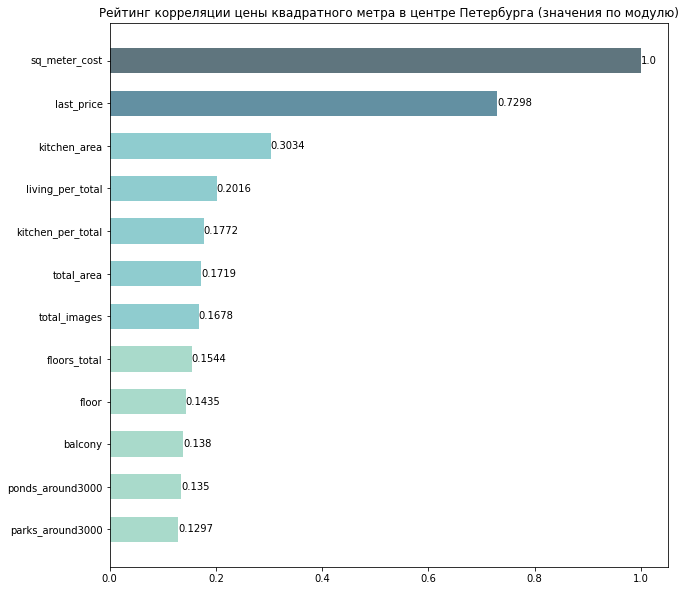

In [ ]:
ranking(abs(data_center.corr()['sq_meter_cost']).sort_values(ascending = False).head(12),'Рейтинг корреляции цены квадратного метра в центре Петербурга (значения по модулю)')

Мы видим, что в центре Петербурга существенное влияние на цену квадратного метра имеют факторы:
- отношение площади кухни к общей площади
- отношение жилой площади к общей площади
- количество комнат
- количество этаже в доме
- площадь кухни
- этаж
- жилая площадь
- число балконов
- количество фотографий квартиры
- тип этажа квартиры (первый, последний, другой)

#### Вывод

- Мы выделили сегмент квартир в центре.


- Проанализировали эту территорию и изучили следующие параметры: площадь, цена, число комнат, высота потолков. Средняя площадь и цена квартир в центре Петербурга больше, чем если рассматривать все данные. Среднее отношение жилой площади к общей в центре Питера тоже немного больше. Соотношение площади кухни к общей в центре Питера в среднем немного меньше. Среднее количество комнат в центре Питера больше (меньше однокомнатных квартир). В центре Питера больше средняя высота потолков.


- Также мы выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Число комнат больше влияет на цену квадртного метра в центре Петербурга. Этаж также больше влияет на цену в центре Петербурга. Удаленность от центра перестает существенно влиять на цену, когда квартира уже в центре. Дата размещения объявления меньше влияет на стоимость квадратного метра в центре Петербурга.


- Рейтинг корреляции цены квадратного метра в центре Петербурга (значения по модулю):
 - `kitchen_per_total`    0.311676
 - `living_per_total`     0.273718
 - `rooms`                0.262426
 - `floors_total`         0.227459
 - `kitchen_area`         0.217347
 - `floor`                0.197559
 - `living_area`          0.163526
 - `balcony`              0.162914
 - `total_images`         0.157880
 - `floor_type`           0.139068
 
 
- Мы видим, что: 
 - удаленность от центра перестает существенно влиять на цену, когда квартира уже в центре. 
 - Высота потолков существенно меньше влияет на стоимость квадратного метра в центре Петербурга.
 - Влияние общей площади и жилой площади изменило знак, и теперь стоимость квадратного метра и общая площадь связаны отрицательно 
 - Усилилось влияние аэропортов поблизости, и теперь связано со стоимостью положительно
 - Число комнат больше стало влиять на стоимость
 - Число балконов больше стало влиять на стоимость
 - Количество парков в окретности 3 км меньше влияет на стоимость
 - Площадь кухни меньше влияет на стоимость

### Вывод

- **Мы изучили следующие параметры: площадь, цена, число комнат, высота потолков. Построили гистограммы для каждого параметра.**
  - На гистограммах, описывающих площадь и высоту потолков, наблюдается мультимодальность. Это связано с тем, что существуют стандарты площадей и высот потолков.
 
 
  - Цена и число комнат приблизительно описываются распределением Пуассона, цена одного квадратного метра - нормальным распределением.
 
 
  - Мы создали портрет самой типичной квартиры - двухкомнатной квартиры в пятиэтажке:
  
  
  - *Общая площадь, м2: 45.0*
  - *Жилая площадь, , м2: 30.0*
  - *Отношение жилой площади к общей площади: 0.585009* 
  - *Площадь кухни, м2: 6.0*
  - *Отношение площади кухни к общей площади: 0.161075*
  - *Высота потолков, м: 2.65*
  - *Цена, руб.: 4 000 000*

- **Мы изучили время продажи квартиры.** 

  - Построили гистограмму. Посчитали среднее и медиану. 

  - Обычно продажа занимает 181 день. 

  - Мы можем сказать, что продажи шли слишком быстро, если они закончились за 45 дней, слишком долго, если они закончились за более чем 232 дня.

  - Мы установили, что встречаются пиковые значения на гистограмме времени продаж, большая их часть лежит в области быстрых продаж, максимальный пик приходится на 45 дней. Это может быть связано с контрактами с риэлторами, которые обязуются продать квартиру "быстро" за определенный срок.


- **Мы убрали редкие и выбивающиеся значения.** Было исключено 28% данных. Обнаружили, что корреляция цены квадратного метра с прочими параметрами стала другой.


 - **Мы ответили на вопрос: какие факторы больше всего влияют на стоимость квартиры?** 
На цену квадратного метра больше всего влияют: удаленность от центра, площадь кухни, высота потолков, отношение площади кухни к общей площади, отношение жилой площади к общей площади, тип этажа, расстояние до ближайшего парка, количество фотографий, количество прудов и парков в радиусе 3 км.


  - Рейтинг корреляции цены квадратного метра (значения по модулю):
  
  - `cityCenters_nearest`    0.397625
  - `kitchen_area`           0.321843
  - `ceiling_height`         0.252897
  - `kitchen_per_total`      0.252713
  - `living_per_total`       0.225705
  - `floor_type`             0.151362
  - `total_images`           0.148911
  - `ponds_around3000`       0.148869
  - `parks_around3000`       0.144191
  - `floors_total`           0.136601
 
- **Мы изучили, зависит ли цена от площади, числа комнат, удалённости от центра.**
Цена квадратного метра жилья зависит от площади (увеличивается с ростом площади), зависит от числа комнат (падает для многокомнатных квартир), зависит от удаленности от центра (сильно увеличивается при приближении к центру).


- **Мы изучили зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.**
Цена первых этажей дешевле всего, цена "других" этажей самая высокая.


- **Также изучили зависимость цены от даты размещения: дня недели, месяца и года.**
Цена падает к концу недели, практически не зависит от месяца, росла с 2014 до 2017 года и немного падает после 2017 года.


- **Мы выбрали 10 населённых пунктов с наибольшим числом объявлений.**
 - Посчитали среднюю цену квадратного метра в этих населённых пунктах. 
 - Самая высокая стоимость жилья - в Санкт-Петербурге и Пушкине, самая низкая - в Ломоносове и Красном Селе.


- **Мы выяснили, какая область входит в центр.**
 - Посчитали среднюю цену для каждого километра. 
 - Определили по графику границу центральной зоны.



- **Мы выделили сегмент квартир в центре.**.

  - Проанализировали эту территорию и изучили следующие параметры: площадь, цена, число комнат, высота потолков. Средняя площадь и цена квартир в центре Петербурга больше, чем если рассматривать все данные. Среднее отношение жилой площади к общей в центре Питера тоже немного больше. Соотношение площади кухни к общей в центре Питера в среднем немного меньше. Среднее количество комнат в центре Питера больше (меньше однокомнатных квартир). В центре Питера больше средняя высота потолков.
  

  - Также мы выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Число комнат больше влияет на цену квадртного метра в центре Петербурга. Этаж также больше влияет на цену в центре Петербурга. Удаленность от центра перестает существенно влиять на цену, когда квартира уже в центре. Дата размещения объявления меньше влияет на стоимость квадратного метра в центре Петербурга.


 - Рейтинг корреляции цены квадратного метра в центре Петербурга (значения по модулю):
 
  - `kitchen_per_total`    0.311676
  - `living_per_total`     0.273718
  - `rooms`                0.262426
  - `floors_total`         0.227459
  - `kitchen_area`         0.217347
  - `floor`                0.197559
  - `living_area`          0.163526
  - `balcony`              0.162914
  - `total_images`         0.157880
  - `floor_type`           0.139068
 
 
 - Мы видим, что: 
  - удаленность от центра перестает существенно влиять на цену, когда квартира уже в центре. 
  - Высота потолков существенно меньше влияет на стоимость квадратного метра в центре Петербурга.
  - Влияние общей площади и жилой площади изменило знак, и теперь стоимость квадратного метра и общая площадь связаны отрицательно 
  - Усилилось влияние аэропортов поблизости, и теперь связано со стоимостью положительно
  - Число комнат больше стало влиять на стоимость
  - Число балконов больше стало влиять на стоимость
  - Количество парков в окретности 3 км меньше влияет на стоимость
  - Площадь кухни меньше влияет на стоимость

<a id='section5'></a>

### Шаг 5. Общий вывод

### Предобработка данных ###


- Мы поменяли значение количества комнат 0 на 1 для квартир, которые не являются студиями. Такая проблема могла возникнуть, скорее всего, из-за описок или неправильной интерпретации.


- Мы заменили значения высоты потолков меньше 2 метров и пропущенные значения на медиану по типу дома (тип дома находили исходя из его этажности). В случае отсутствии информации о количестве этажей дома заменяли значения высоты потолков на общую медиану. Такие проблемы могли возникнуть из-за описок и из-за неправильной выгрузки данных. Мы обнаружлили, что высоты потолков бьются достаточно четко на 2 группы - до 14 м и больше 20 м. Посчитали, что вторая группа- это неправильно выгруженные даннные в дециметрах вместо метров, и пересчитали их в метрах. 


- Мы обнаружили, что у нас пропущены значения количества этажей в доме, при этом есть значения этажа квартиры. Пропущенные значения оставлены без изменений, т.к. сложно восстановить эту информацию.


- Обработали столбец с жилой площадью. У нас есть данные по общей площади. Сделали вспомогательный столбец `living_per_total`- отношение жилой площади к общей площади и затем воспользовались его средним значением по количеству комнат для нахождения жилой площади.Такие пропуски могли возникнуть, если продавцы указывали неполную информацию.


- Столбцу "аппартаменты" поменяли тип на булевый. Будем считать что пропущенные значения соответствуют значению параметра False. После конвертации типа данных наши пропущенные данные автоматически инициировались этим значением. Такие пропуски могли возникнуть, если продавцы не указывали данный параметр при его отсутствии.


- Пропущенные значения столбца "площадь кухни" заменили по тому же принципу, что и жилую площадь: создали дополнительный столбец `kitchen_per_total` с отношением площади кухни к общей площади и воспользовались его средним значением по количеству комнат для вычисления "потерянной" площади кухни. Такие пропуски могли возникнуть, если продавцы указывали неполную информацию.


- Пропущенное количество балконов поменяли на 0. Считаем, что если их не указали, значит нет.


- Пропущенное название населенного пункта оставили без изменений, т.к. эту информацию сложно воссстановить.


- Ближайшие аэропорты можно найти более точно, если запросить еще раз геоданные по адресу, но у нас такой возможности не было. Мы попробовали заполнить медианным значением по населенному пункту, но таких данных оказалось тоже мало, таким образом, у нас остались незаполненные пропуски. Скорее всего, причина отсутствия значений в том, что были неправильные выгрузки данных, либо продавцы никогда не считали и отказались заполнять данный параметр.



- Оставили без изменений пропущенные значения "парков в окресности 3 км" и "расстояния до ближайшего парка". Причины возникновения данных пропусков - либо продавец не стал указывать данную информацию , либо была неправильная выгрузка геоданных). 


- Оставили без изменений пропущенные значения "водоемов в окресности 3 км" и "расстояния до ближайшего водоема". Причины возникновения данных пропусков - либо продавец не стал указывать данную информацию , либо была неправильная выгрузка геоданных). 


- Заменили пропущенные значения "дней размещения объявления" на 0 (у нас такого значения не было, и мы будем знать, что 0 - это бывшие "пропуски", но нам удобнее будет работать с таблицей. Причины данных пропусков точно не ясны: либо это была продажа в тот же день, либо эти квартиры все еще не продались, либо были ошибки в выгрузке.


- Мы не нашли дубликатов в наших данных


- Поменяли типы некоторых столбцов: балконы и дни показа объявления сделали целочисленными. Дату публикации перевели в формат даты и округлили до дня. 


- Мы записали в новые столбцы: 

 - цену квадратного метра;

 - день недели, месяц и год публикации объявления;

 - этаж квартиры; варианты — первый, последний, другой;




### Исследовательский анализ данных###



- **Мы изучили следующие параметры: площадь, цена, число комнат, высота потолков. Построили гистограммы для каждого параметра.**
  - На гистограммах, описывающих площадь и высоту потолков, наблюдается мультимодальность. Это связано с тем, что существуют стандарты площадей и высот потолков.
 
 
  - Цена и число комнат приблизительно описываются распределением Пуассона, цена одного квадратного метра - нормальным распределением.
 
 
  - Мы создали портрет самой типичной квартиры - двухкомнатной квартиры в пятиэтажке:
  
  
  - *Общая площадь, м2: 45.0*
  - *Жилая площадь, , м2: 30.0*
  - *Отношение жилой площади к общей площади: 0.585009* 
  - *Площадь кухни, м2: 6.0*
  - *Отношение площади кухни к общей площади: 0.161075*
  - *Высота потолков, м: 2.65*
  - *Цена, руб.: 4 000 000*

- **Мы изучили время продажи квартиры.** 

  - Построили гистограмму. Посчитали среднее и медиану. 

  - Обычно продажа занимает 181 день. 

  - Мы можем сказать, что продажи шли слишком быстро, если они закончились за 45 дней, слишком долго, если они закончились за более чем 232 дня.

  - Мы установили, что встречаются пиковые значения на гистограмме времени продаж, большая их часть лежит в области быстрых продаж, максимальный пик приходится на 45 дней. Это может быть связано с особенностями работы сервиса по размещению объявлений (платные, бесплатные подписки на определенный срок).


- **Мы убрали редкие и выбивающиеся значения.** Было исключено 28% данных. Обнаружили, что корреляция цены квадратного метра с прочими параметрами стала другой.


 - **Мы ответили на вопрос: какие факторы больше всего влияют на стоимость квартиры?** 
На цену квадратного метра больше всего влияют: удаленность от центра, площадь кухни, высота потолков, отношение площади кухни к общей площади, отношение жилой площади к общей площади, тип этажа, расстояние до ближайшего парка, количество фотографий, количество прудов и парков в радиусе 3 км.


  - Рейтинг корреляции цены квадратного метра (значения по модулю):
  
  - `cityCenters_nearest`    0.397625
  - `kitchen_area`           0.321843
  - `ceiling_height`         0.252897
  - `kitchen_per_total`      0.252713
  - `living_per_total`       0.225705
  - `floor_type`             0.151362
  - `total_images`           0.148911
  - `ponds_around3000`       0.148869
  - `parks_around3000`       0.144191
  - `floors_total`           0.136601
 
- **Мы изучили, зависит ли цена от площади, числа комнат, удалённости от центра.**
Цена квадратного метра жилья зависит от площади (увеличивается с ростом площади), зависит от числа комнат (падает для многокомнатных квартир), зависит от удаленности от центра (сильно увеличивается при приближении к центру).


- **Мы изучили зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.**
Цена первых этажей дешевле всего, цена "других" этажей самая высокая.


- **Также изучили зависимость цены от даты размещения: дня недели, месяца и года.**
Цена падает к концу недели, практически не зависит от месяца, росла с 2014 до 2017 года и немного падает после 2017 года.


- **Мы выбрали 10 населённых пунктов с наибольшим числом объявлений.**
 - Посчитали среднюю цену квадратного метра в этих населённых пунктах. 
 - Самая высокая стоимость жилья - в Санкт-Петербурге и Пушкине, самая низкая - в Ломоносове и Красном Селе.


- **Мы выяснили, какая область входит в центр.**
 - Посчитали среднюю цену для каждого километра. 
 - Определили по графику границу центральной зоны.



- **Мы выделили сегмент квартир в центре.**.

  - Проанализировали эту территорию и изучили следующие параметры: площадь, цена, число комнат, высота потолков. Средняя площадь и цена квартир в центре Петербурга больше, чем если рассматривать все данные. Среднее отношение жилой площади к общей в центре Питера тоже немного больше. Соотношение площади кухни к общей в центре Питера в среднем немного меньше. Среднее количество комнат в центре Питера больше (меньше однокомнатных квартир). В центре Питера больше средняя высота потолков.
  

  - Также мы выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Число комнат больше влияет на цену квадртного метра в центре Петербурга. Этаж также больше влияет на цену в центре Петербурга. Удаленность от центра перестает существенно влиять на цену, когда квартира уже в центре. Дата размещения объявления меньше влияет на стоимость квадратного метра в центре Петербурга.


 - Рейтинг корреляции цены квадратного метра в центре Петербурга (значения по модулю):
 
  - `kitchen_per_total`    0.311676
  - `living_per_total`     0.273718
  - `rooms`                0.262426
  - `floors_total`         0.227459
  - `kitchen_area`         0.217347
  - `floor`                0.197559
  - `living_area`          0.163526
  - `balcony`              0.162914
  - `total_images`         0.157880
  - `floor_type`           0.139068
 
 
 - Мы видим, что: 
  - удаленность от центра перестает существенно влиять на цену, когда квартира уже в центре. 
  - Высота потолков существенно меньше влияет на стоимость квадратного метра в центре Петербурга.
  - Влияние общей площади и жилой площади изменило знак, и теперь стоимость квадратного метра и общая площадь связаны отрицательно 
  - Усилилось влияние аэропортов поблизости, и теперь связано со стоимостью положительно
  - Число комнат больше стало влиять на стоимость
  - Число балконов больше стало влиять на стоимость
  - Количество парков в окретности 3 км меньше влияет на стоимость
  - Площадь кухни меньше влияет на стоимость
